In [ ]:
import sys
import math
import torch
import numpy as np
from collections import deque
from unityagents import UnityEnvironment

import matplotlib.pyplot as plt
%matplotlib inline

from agent import Parameters, AgentManager

In [2]:
def train(params, n_episodes=2000, max_steps=500, solved_score=0.5, max_last_scores=100,
          actor_path='actor_model_{}.pth', critic_path='critic_model.pth'):

    env = UnityEnvironment(file_name="Tennis.x86_64")

    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    
    # reset the environment
    env_info = env.reset(train_mode=True)[brain_name]
    
    # number of agents
    num_agents = len(env_info.agents)
    print('Number of agents:', num_agents)
    
    # size of each action
    action_size = brain.vector_action_space_size
    print('Size of each action:', action_size)
    
    # examine the state space
    states = env_info.vector_observations
    state_size = states.shape[1]
    print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
    print('The state for the first agent looks like:', states[0])

    agent_manager = AgentManager(params=params, state_size=state_size, 
                                 action_size=action_size, num_agents=num_agents, random_seed=1)

    last_scores = []
    all_scores = []
    for _ in range(num_agents):
        last_scores.append(deque(maxlen=max_last_scores))
        all_scores.append([])
    #all_scores = []

    max_last_average_score = -math.inf

    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        agent_manager.reset()

        for t in range(max_steps):
            actions = agent_manager.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done

            agent_manager.step(states, actions, rewards, next_states, dones, t)

            states = next_states
            scores += rewards

            if np.any(dones):
                break

        scores_string = "average scores: "
        for i in range(num_agents):
            average_score = np.mean(scores[i])

            last_scores[i].append(average_score)
            all_scores[i].append(average_score)

            last_average_score = np.mean(last_scores[i])

            scores_string += "agent {} - {:.2f}, ".format(i, last_average_score)

            if last_average_score > max_last_average_score:
                max_last_average_score = last_average_score

        print("\repisode {}/{}, max score: {:.2f}, {}".format(
            i_episode, n_episodes, max_last_average_score, scores_string), end="")
        sys.stdout.flush()

        if max_last_average_score >= solved_score:
            print("\nsolved in {} episodes".format(i_episode))

            torch.save(agent_manager.actors[0].local.state_dict(), actor_path.format("1"))
            torch.save(agent_manager.actors[1].local.state_dict(), actor_path.format("2"))
            torch.save(agent_manager.critic.local.state_dict(), critic_path)

            plt.figure()

            lines = []
            lines.append(plt.plot(all_scores[0], color="green", label="agent 1")[0])
            lines.append(plt.plot(all_scores[1], color="red", label="agent 2")[0])

            plt.legend(handles=lines, loc=2)
            plt.ylabel("score")
            plt.xlabel("episode #")
            plt.show()

            break

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
episode 1/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 2/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

/home/mexxik/.virtualenvs/drl-project-3/lib/python3.5/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


episode 3/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 4/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 5/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 6/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 7/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 8/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 9/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 10/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 11/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 12/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 13/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 14/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 15/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 16/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 17/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 18/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 19/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 20/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 21/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 22/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 23/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 24/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 25/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 26/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 27/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 28/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 29/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 30/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 31/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 32/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 33/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 34/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 35/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 36/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 37/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 38/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 39/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 40/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 41/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 42/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 43/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 44/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 45/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 46/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 47/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 48/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 49/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 50/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 51/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 52/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 53/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 54/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 55/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 56/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 57/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 58/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 59/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 60/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 61/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 62/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 63/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 64/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 65/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 66/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 67/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 68/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 69/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 70/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 71/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 72/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 73/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 74/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 75/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 76/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 77/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 78/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 79/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 80/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 81/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 82/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 83/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 84/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 85/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 86/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 87/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 88/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 89/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 90/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 91/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 92/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 93/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 94/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 95/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 96/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 97/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 98/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 99/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 100/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 101/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 102/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 103/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 104/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 105/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 106/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 107/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 108/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 109/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 110/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 111/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 112/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 113/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 114/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 115/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 116/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 117/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 118/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 119/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 120/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 121/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 122/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 123/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 124/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 125/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 126/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 127/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 128/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 129/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 130/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 131/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 132/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 133/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 134/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 135/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 136/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 137/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 138/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 139/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 140/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 141/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 142/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 143/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 144/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 145/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 146/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 147/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 148/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 149/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 150/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 151/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 152/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 153/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 154/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 155/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 156/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 157/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 158/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 159/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 160/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 161/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 162/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 163/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 164/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 165/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 166/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 167/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 168/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 169/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 170/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 171/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 172/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 173/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 174/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 175/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 176/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 177/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 178/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 179/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 180/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 181/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 182/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 183/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 184/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 185/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 186/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 187/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 188/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 189/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 190/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 191/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 192/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 193/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 194/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 195/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 196/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 197/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 198/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 199/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 200/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 201/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 202/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 203/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 204/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 205/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 206/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 207/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 208/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 209/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 210/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 211/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 212/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 213/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 214/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 215/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 216/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 217/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 218/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 219/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 220/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 221/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 222/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 223/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 224/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 225/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 226/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 227/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 228/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 229/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 230/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 231/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 232/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 233/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 234/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 235/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 236/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 237/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 238/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 239/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 240/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 241/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 242/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 243/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 244/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 245/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 246/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 247/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 248/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 249/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 250/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 251/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 252/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 253/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 254/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 255/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 256/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 257/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 258/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 259/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 260/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 261/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 262/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 263/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 264/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 265/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 266/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 267/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 268/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 269/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 270/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 271/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 272/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 273/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 274/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 275/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 276/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 277/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 278/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 279/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 280/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 281/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 282/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 283/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 284/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 285/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 286/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 287/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 288/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 289/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 290/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 291/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 292/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 293/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 294/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 295/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 296/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 297/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 298/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 299/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 300/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 301/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 302/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 303/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 304/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 305/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 306/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 307/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 308/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 309/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 310/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 311/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 312/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 313/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 314/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 315/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 316/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 317/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 318/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 319/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 320/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 321/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 322/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 323/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 324/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 325/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 326/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 327/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 328/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 329/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 330/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 331/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 332/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 333/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 334/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 335/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 336/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 337/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 338/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 339/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 340/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 341/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 342/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 343/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 344/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 345/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 346/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 347/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 348/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 349/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 350/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 351/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 352/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 353/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 354/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 355/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 356/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 357/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 358/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 359/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 360/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 361/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 362/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 363/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 364/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 365/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 366/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 367/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 368/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 369/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 370/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 371/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 372/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 373/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 374/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 375/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 376/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 377/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 378/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 379/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 380/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 381/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 382/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 383/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 384/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 385/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 386/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 387/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 388/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 389/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 390/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 391/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 392/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 393/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 394/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 395/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 396/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 397/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 398/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 399/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 400/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 401/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 402/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 403/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 404/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 405/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 406/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 407/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 408/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 409/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 410/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 411/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 412/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 413/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 414/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 415/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 416/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 417/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 418/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 419/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 420/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 421/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 422/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 423/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 424/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 425/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 426/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 427/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 428/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 429/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 430/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 431/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 432/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 433/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 434/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 435/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 436/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 437/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 438/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 439/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 440/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 441/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 442/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 443/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 444/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 445/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 446/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 447/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 448/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 449/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 450/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 451/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 452/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 453/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 454/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 455/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 456/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 457/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 458/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 459/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 460/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 461/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 462/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 463/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 464/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 465/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 466/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 467/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 468/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 469/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 470/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 471/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 472/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 473/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 474/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 475/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 476/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 477/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 478/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 479/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 480/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 481/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 482/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 483/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 484/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 485/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 486/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 487/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 488/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 489/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 490/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 491/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 492/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 493/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 494/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 495/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 496/2000, max score: 0.08, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 497/2000, max score: 0.08, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 498/2000, max score: 0.08, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 499/2000, max score: 0.08, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 500/2000, max score: 0.08, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 501/2000, max score: 0.08, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 502/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 503/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 504/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 505/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 506/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 507/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 508/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 509/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 510/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 511/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 512/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 513/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 514/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 515/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 516/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 517/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 518/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 519/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 520/2000, max score: 0.10, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 521/2000, max score: 0.10, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 522/2000, max score: 0.10, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 523/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 524/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 525/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 526/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 527/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 528/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 529/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 530/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 531/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 532/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 533/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 534/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 535/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 536/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 537/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 538/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 539/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 540/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 541/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 542/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 543/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 544/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 545/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 546/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 547/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 548/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 549/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 550/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 551/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 552/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 553/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 554/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 555/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 556/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 557/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 558/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 559/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 560/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 561/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 562/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 563/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 564/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 565/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 566/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 567/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 568/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 569/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 570/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 571/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 572/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 573/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 574/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 575/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 576/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 577/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 578/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 579/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 580/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 581/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 582/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 583/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 584/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 585/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 586/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 587/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 588/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 589/2000, max score: 0.13, average scores: agent 0 - 0.12, agent 1 - 0.13, 

episode 590/2000, max score: 0.13, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 591/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.12, 

episode 592/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 593/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 594/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 595/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 596/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 597/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 598/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 599/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 600/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 601/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 602/2000, max score: 0.14, average scores: agent 0 - 0.13, agent 1 - 0.14, 

episode 603/2000, max score: 0.14, average scores: agent 0 - 0.13, agent 1 - 0.14, 

episode 604/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 605/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 606/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 607/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 608/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 609/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 610/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 611/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 612/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 613/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 614/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 615/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 616/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 617/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 618/2000, max score: 0.15, average scores: agent 0 - 0.15, agent 1 - 0.15, 

episode 619/2000, max score: 0.15, average scores: agent 0 - 0.15, agent 1 - 0.15, 

episode 620/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 621/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 622/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 623/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 624/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 625/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 626/2000, max score: 0.15, average scores: agent 0 - 0.15, agent 1 - 0.15, 

episode 627/2000, max score: 0.16, average scores: agent 0 - 0.15, agent 1 - 0.16, 

episode 628/2000, max score: 0.16, average scores: agent 0 - 0.15, agent 1 - 0.16, 

episode 629/2000, max score: 0.16, average scores: agent 0 - 0.16, agent 1 - 0.16, 

episode 630/2000, max score: 0.16, average scores: agent 0 - 0.16, agent 1 - 0.16, 

episode 631/2000, max score: 0.17, average scores: agent 0 - 0.16, agent 1 - 0.17, 

episode 632/2000, max score: 0.17, average scores: agent 0 - 0.16, agent 1 - 0.17, 

episode 633/2000, max score: 0.17, average scores: agent 0 - 0.16, agent 1 - 0.17, 

episode 634/2000, max score: 0.17, average scores: agent 0 - 0.16, agent 1 - 0.17, 

episode 635/2000, max score: 0.18, average scores: agent 0 - 0.17, agent 1 - 0.18, 

episode 636/2000, max score: 0.18, average scores: agent 0 - 0.17, agent 1 - 0.18, 

episode 637/2000, max score: 0.18, average scores: agent 0 - 0.16, agent 1 - 0.18, 

episode 638/2000, max score: 0.18, average scores: agent 0 - 0.16, agent 1 - 0.18, 

episode 639/2000, max score: 0.19, average scores: agent 0 - 0.18, agent 1 - 0.19, 

episode 640/2000, max score: 0.19, average scores: agent 0 - 0.18, agent 1 - 0.19, 

episode 641/2000, max score: 0.19, average scores: agent 0 - 0.18, agent 1 - 0.19, 

episode 642/2000, max score: 0.19, average scores: agent 0 - 0.18, agent 1 - 0.19, 

episode 643/2000, max score: 0.19, average scores: agent 0 - 0.18, agent 1 - 0.19, 

episode 644/2000, max score: 0.19, average scores: agent 0 - 0.18, agent 1 - 0.19, 

episode 645/2000, max score: 0.20, average scores: agent 0 - 0.19, agent 1 - 0.20, 

episode 646/2000, max score: 0.20, average scores: agent 0 - 0.19, agent 1 - 0.20, 

episode 647/2000, max score: 0.20, average scores: agent 0 - 0.20, agent 1 - 0.20, 

episode 648/2000, max score: 0.21, average scores: agent 0 - 0.20, agent 1 - 0.21, 

episode 649/2000, max score: 0.21, average scores: agent 0 - 0.20, agent 1 - 0.21, 

episode 650/2000, max score: 0.21, average scores: agent 0 - 0.21, agent 1 - 0.21, 

episode 651/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 652/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 653/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 654/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 655/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 656/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 657/2000, max score: 0.22, average scores: agent 0 - 0.22, agent 1 - 0.22, 

episode 658/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 659/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 660/2000, max score: 0.23, average scores: agent 0 - 0.21, agent 1 - 0.23, 

episode 661/2000, max score: 0.23, average scores: agent 0 - 0.21, agent 1 - 0.23, 

episode 662/2000, max score: 0.23, average scores: agent 0 - 0.22, agent 1 - 0.23, 

episode 663/2000, max score: 0.24, average scores: agent 0 - 0.23, agent 1 - 0.24, 

episode 664/2000, max score: 0.24, average scores: agent 0 - 0.23, agent 1 - 0.24, 

episode 665/2000, max score: 0.24, average scores: agent 0 - 0.23, agent 1 - 0.24, 

episode 666/2000, max score: 0.25, average scores: agent 0 - 0.23, agent 1 - 0.25, 

episode 667/2000, max score: 0.25, average scores: agent 0 - 0.24, agent 1 - 0.25, 

episode 668/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.26, 

episode 669/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.26, 

episode 670/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.26, 

episode 671/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.25, 

episode 672/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.25, 

episode 673/2000, max score: 0.26, average scores: agent 0 - 0.23, agent 1 - 0.25, 

episode 674/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.25, 

episode 675/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.26, 

episode 676/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.26, 

episode 677/2000, max score: 0.27, average scores: agent 0 - 0.25, agent 1 - 0.27, 

episode 678/2000, max score: 0.27, average scores: agent 0 - 0.25, agent 1 - 0.27, 

episode 679/2000, max score: 0.27, average scores: agent 0 - 0.25, agent 1 - 0.26, 

episode 680/2000, max score: 0.27, average scores: agent 0 - 0.25, agent 1 - 0.26, 

episode 681/2000, max score: 0.27, average scores: agent 0 - 0.25, agent 1 - 0.27, 

episode 682/2000, max score: 0.27, average scores: agent 0 - 0.25, agent 1 - 0.27, 

episode 683/2000, max score: 0.28, average scores: agent 0 - 0.26, agent 1 - 0.28, 

episode 684/2000, max score: 0.28, average scores: agent 0 - 0.27, agent 1 - 0.28, 

episode 685/2000, max score: 0.28, average scores: agent 0 - 0.26, agent 1 - 0.28, 

episode 686/2000, max score: 0.28, average scores: agent 0 - 0.27, agent 1 - 0.28, 

episode 687/2000, max score: 0.28, average scores: agent 0 - 0.27, agent 1 - 0.28, 

episode 688/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 689/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 690/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 691/2000, max score: 0.29, average scores: agent 0 - 0.27, agent 1 - 0.29, 

episode 692/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 693/2000, max score: 0.29, average scores: agent 0 - 0.27, agent 1 - 0.29, 

episode 694/2000, max score: 0.29, average scores: agent 0 - 0.27, agent 1 - 0.29, 

episode 695/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 696/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 697/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 698/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 699/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 700/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 701/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 702/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 703/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 704/2000, max score: 0.30, average scores: agent 0 - 0.29, agent 1 - 0.30, 

episode 705/2000, max score: 0.30, average scores: agent 0 - 0.29, agent 1 - 0.30, 

episode 706/2000, max score: 0.30, average scores: agent 0 - 0.29, agent 1 - 0.30, 

episode 707/2000, max score: 0.30, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 708/2000, max score: 0.31, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 709/2000, max score: 0.31, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 710/2000, max score: 0.31, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 711/2000, max score: 0.31, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 712/2000, max score: 0.31, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 713/2000, max score: 0.32, average scores: agent 0 - 0.31, agent 1 - 0.32, 

episode 714/2000, max score: 0.32, average scores: agent 0 - 0.31, agent 1 - 0.32, 

episode 715/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 716/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 717/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 718/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 719/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 720/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 721/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 722/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 723/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 724/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 725/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 726/2000, max score: 0.33, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 727/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.34, 

episode 728/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.34, 

episode 729/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.34, 

episode 730/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 731/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 732/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 733/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 734/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 735/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 736/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 737/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 738/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 739/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 740/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 741/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 742/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 743/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 744/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 745/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.30, 

episode 746/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.30, 

episode 747/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 748/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.29, 

episode 749/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.29, 

episode 750/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 751/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 752/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 753/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 754/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 755/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 756/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.29, 

episode 757/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 758/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 759/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.29, 

episode 760/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.29, 

episode 761/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.29, 

episode 762/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 763/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 764/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 765/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 766/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 767/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.26, 

episode 768/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 769/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.26, 

episode 770/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 771/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 772/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.27, 

episode 773/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 774/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 775/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.27, 

episode 776/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.27, 

episode 777/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.27, 

episode 778/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.27, 

episode 779/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 780/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.27, 

episode 781/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.27, 

episode 782/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 783/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 784/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 785/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 786/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 787/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 788/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 789/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 790/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 791/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 792/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 793/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 794/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 795/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 796/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 797/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 798/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 799/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 800/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 801/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 802/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 803/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 804/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 805/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 806/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.26, 

episode 807/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 808/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 809/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 810/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 811/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 812/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 813/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 814/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.24, 

episode 815/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 816/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 817/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 818/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.24, 

episode 819/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.24, 

episode 820/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.24, 

episode 821/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.24, 

episode 822/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 823/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 824/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 825/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 826/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.24, 

episode 827/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.23, 

episode 828/2000, max score: 0.34, average scores: agent 0 - 0.24, agent 1 - 0.23, 

episode 829/2000, max score: 0.34, average scores: agent 0 - 0.24, agent 1 - 0.23, 

episode 830/2000, max score: 0.34, average scores: agent 0 - 0.24, agent 1 - 0.23, 

episode 831/2000, max score: 0.34, average scores: agent 0 - 0.24, agent 1 - 0.23, 

episode 832/2000, max score: 0.34, average scores: agent 0 - 0.24, agent 1 - 0.23, 

episode 833/2000, max score: 0.34, average scores: agent 0 - 0.24, agent 1 - 0.23, 

episode 834/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 835/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 836/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 837/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 838/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 839/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 840/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 841/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 842/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.26, 

episode 843/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.26, 

episode 844/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.26, 

episode 845/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.27, 

episode 846/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 847/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 848/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 849/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 850/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 851/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 852/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 853/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 854/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 855/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 856/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 857/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 858/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 859/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 860/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.28, 

episode 861/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.28, 

episode 862/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.28, 

episode 863/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 864/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 865/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 866/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 867/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 868/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 869/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 870/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 871/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 872/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 873/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 874/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 875/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 876/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 877/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 878/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 879/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 880/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 881/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 882/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 883/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 884/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 885/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 886/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 887/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 888/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 889/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 890/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 891/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 892/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 893/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 894/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 895/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 896/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 897/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 898/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 899/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 900/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 901/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 902/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 903/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 904/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 905/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 906/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 907/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 908/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 909/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 910/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 911/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 912/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 913/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 914/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 915/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 916/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 917/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 918/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 919/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 920/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 921/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 922/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 923/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 924/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 925/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 926/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 927/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 928/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 929/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 930/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 931/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 932/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 933/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 934/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 935/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 936/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 937/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 938/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 939/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 940/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 941/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 942/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 943/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 944/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 945/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 946/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 947/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 948/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 949/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 950/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 951/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 952/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 953/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 954/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 955/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 956/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 957/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 958/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 959/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 960/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 961/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 962/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 963/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 964/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 965/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 966/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 967/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 968/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 969/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 970/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 971/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 972/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 973/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 974/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 975/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 976/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 977/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 978/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 979/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 980/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.30, 

episode 981/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 982/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 983/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 984/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 985/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 986/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 987/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 988/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 989/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 990/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 991/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 992/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 993/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 994/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 995/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 996/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 997/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 998/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 999/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1000/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1001/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1002/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1003/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1004/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 1005/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 1006/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 1007/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 1008/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 1009/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.32, 

episode 1010/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1011/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1012/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1013/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 1014/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 1015/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 1016/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.35, 

episode 1017/2000, max score: 0.36, average scores: agent 0 - 0.35, agent 1 - 0.36, 

episode 1018/2000, max score: 0.36, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 1019/2000, max score: 0.36, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 1020/2000, max score: 0.36, average scores: agent 0 - 0.36, agent 1 - 0.36, 

episode 1021/2000, max score: 0.36, average scores: agent 0 - 0.36, agent 1 - 0.36, 

episode 1022/2000, max score: 0.36, average scores: agent 0 - 0.35, agent 1 - 0.36, 

episode 1023/2000, max score: 0.37, average scores: agent 0 - 0.36, agent 1 - 0.37, 

episode 1024/2000, max score: 0.38, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1025/2000, max score: 0.38, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1026/2000, max score: 0.38, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1027/2000, max score: 0.38, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1028/2000, max score: 0.38, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1029/2000, max score: 0.39, average scores: agent 0 - 0.38, agent 1 - 0.39, 

episode 1030/2000, max score: 0.39, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1031/2000, max score: 0.39, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1032/2000, max score: 0.40, average scores: agent 0 - 0.40, agent 1 - 0.40, 

episode 1033/2000, max score: 0.41, average scores: agent 0 - 0.40, agent 1 - 0.41, 

episode 1034/2000, max score: 0.41, average scores: agent 0 - 0.40, agent 1 - 0.40, 

episode 1035/2000, max score: 0.41, average scores: agent 0 - 0.40, agent 1 - 0.40, 

episode 1036/2000, max score: 0.41, average scores: agent 0 - 0.40, agent 1 - 0.40, 

episode 1037/2000, max score: 0.41, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1038/2000, max score: 0.41, average scores: agent 0 - 0.38, agent 1 - 0.39, 

episode 1039/2000, max score: 0.41, average scores: agent 0 - 0.38, agent 1 - 0.39, 

episode 1040/2000, max score: 0.41, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1041/2000, max score: 0.41, average scores: agent 0 - 0.40, agent 1 - 0.40, 

episode 1042/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1043/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1044/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1045/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1046/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1047/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1048/2000, max score: 0.42, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1049/2000, max score: 0.42, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1050/2000, max score: 0.42, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1051/2000, max score: 0.42, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1052/2000, max score: 0.42, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1053/2000, max score: 0.42, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1054/2000, max score: 0.42, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1055/2000, max score: 0.42, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1056/2000, max score: 0.42, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1057/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1058/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1059/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1060/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1061/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1062/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1063/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1064/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.44, 

episode 1065/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.44, 

episode 1066/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.44, 

episode 1067/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.44, 

episode 1068/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1069/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1070/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1071/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1072/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1073/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1074/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1075/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1076/2000, max score: 0.44, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1077/2000, max score: 0.44, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1078/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1079/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1080/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1081/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1082/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1083/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1084/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1085/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1086/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1087/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1088/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1089/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1090/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1091/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1092/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1093/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1094/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1095/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1096/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1097/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1098/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1099/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1100/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1101/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1102/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1103/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1104/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1105/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1106/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1107/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1108/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1109/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1110/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1111/2000, max score: 0.44, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1112/2000, max score: 0.44, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1113/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.40, 

episode 1114/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.40, 

episode 1115/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1116/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1117/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1118/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1119/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1120/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1121/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1122/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1123/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1124/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.36, 

episode 1125/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1126/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1127/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1128/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1129/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.36, 

episode 1130/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1131/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1132/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1133/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1134/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1135/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1136/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1137/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1138/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1139/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1140/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1141/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1142/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1143/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1144/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 1145/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1146/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1147/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1148/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1149/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1150/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1151/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1152/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1153/2000, max score: 0.44, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 1154/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1155/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1156/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1157/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1158/2000, max score: 0.44, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 1159/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1160/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1161/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1162/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1163/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1164/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 1165/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 1166/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1167/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1168/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1169/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1170/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1171/2000, max score: 0.44, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 1172/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1173/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1174/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.35, 

episode 1175/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.35, 

episode 1176/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1177/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1178/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.34, 

episode 1179/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1180/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.34, 

episode 1181/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.34, 

episode 1182/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.33, 

episode 1183/2000, max score: 0.44, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 1184/2000, max score: 0.44, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 1185/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1186/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1187/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1188/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1189/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1190/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 1191/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 1192/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1193/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1194/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1195/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1196/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1197/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1198/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1199/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1200/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1201/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1202/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1203/2000, max score: 0.44, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 1204/2000, max score: 0.44, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 1205/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1206/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1207/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1208/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 1209/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1210/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1211/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1212/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1213/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1214/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1215/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1216/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1217/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1218/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1219/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1220/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1221/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1222/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1223/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1224/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1225/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1226/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1227/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1228/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1229/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1230/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1231/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1232/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1233/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1234/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1235/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1236/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1237/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1238/2000, max score: 0.44, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1239/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1240/2000, max score: 0.44, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1241/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1242/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1243/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1244/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1245/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1246/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1247/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1248/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1249/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1250/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1251/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1252/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1253/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1254/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1255/2000, max score: 0.45, average scores: agent 0 - 0.45, agent 1 - 0.44, 

episode 1256/2000, max score: 0.45, average scores: agent 0 - 0.45, agent 1 - 0.44, 

episode 1257/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1258/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1259/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.42, 

episode 1260/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1261/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1262/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1263/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1264/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1265/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1266/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1267/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1268/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1269/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1270/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1271/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1272/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1273/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1274/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1275/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1276/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1277/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1278/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1279/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1280/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1281/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1282/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1283/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1284/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1285/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1286/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1287/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1288/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1289/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1290/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1291/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1292/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1293/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1294/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1295/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1296/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1297/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1298/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1299/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1300/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1301/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.42, 

episode 1302/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.42, 

episode 1303/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1304/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1305/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1306/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1307/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.40, 

episode 1308/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1309/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1310/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1311/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1312/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1313/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1314/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1315/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1316/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1317/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1318/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1319/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1320/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1321/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1322/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.40, 

episode 1323/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1324/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1325/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1326/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1327/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1328/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1329/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1330/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1331/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1332/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1333/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1334/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1335/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1336/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.38, 

episode 1337/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1338/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1339/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1340/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1341/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1342/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1343/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1344/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1345/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1346/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1347/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1348/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1349/2000, max score: 0.45, average scores: agent 0 - 0.36, agent 1 - 0.36, 

episode 1350/2000, max score: 0.45, average scores: agent 0 - 0.36, agent 1 - 0.36, 

episode 1351/2000, max score: 0.45, average scores: agent 0 - 0.36, agent 1 - 0.36, 

episode 1352/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1353/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1354/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1355/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1356/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1357/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1358/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1359/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1360/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1361/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1362/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1363/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1364/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1365/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1366/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1367/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1368/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1369/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.37, 

episode 1370/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1371/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1372/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1373/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1374/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1375/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1376/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1377/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.36, 

episode 1378/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.37, 

episode 1379/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1380/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.38, 

episode 1381/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.37, 

episode 1382/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1383/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1384/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1385/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1386/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1387/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1388/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1389/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1390/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.40, 

episode 1391/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1392/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.40, 

episode 1393/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1394/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1395/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1396/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1397/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1398/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1399/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1400/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.38, 

episode 1401/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.38, 

episode 1402/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1403/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1404/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.40, 

episode 1405/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.40, 

episode 1406/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1407/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1408/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1409/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1410/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1411/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.42, 

episode 1412/2000, max score: 0.45, average scores: agent 0 - 0.45, agent 1 - 0.44, 

episode 1413/2000, max score: 0.45, average scores: agent 0 - 0.45, agent 1 - 0.44, 

episode 1414/2000, max score: 0.45, average scores: agent 0 - 0.45, agent 1 - 0.45, 

episode 1415/2000, max score: 0.45, average scores: agent 0 - 0.45, agent 1 - 0.44, 

episode 1416/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.45, 

episode 1417/2000, max score: 0.46, average scores: agent 0 - 0.45, agent 1 - 0.44, 

episode 1418/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.45, 

episode 1419/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.45, 

episode 1420/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.46, 

episode 1421/2000, max score: 0.46, average scores: agent 0 - 0.45, agent 1 - 0.45, 

episode 1422/2000, max score: 0.46, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1423/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1424/2000, max score: 0.46, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1425/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1426/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1427/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1428/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1429/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1430/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1431/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1432/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1433/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1434/2000, max score: 0.46, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1435/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1436/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1437/2000, max score: 0.46, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1438/2000, max score: 0.46, average scores: agent 0 - 0.44, agent 1 - 0.44, 

episode 1439/2000, max score: 0.46, average scores: agent 0 - 0.45, agent 1 - 0.45, 

episode 1440/2000, max score: 0.46, average scores: agent 0 - 0.45, agent 1 - 0.45, 

episode 1441/2000, max score: 0.46, average scores: agent 0 - 0.44, agent 1 - 0.44, 

episode 1442/2000, max score: 0.46, average scores: agent 0 - 0.45, agent 1 - 0.45, 

episode 1443/2000, max score: 0.46, average scores: agent 0 - 0.44, agent 1 - 0.44, 

episode 1444/2000, max score: 0.46, average scores: agent 0 - 0.45, agent 1 - 0.45, 

episode 1445/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.46, 

episode 1446/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.46, 

episode 1447/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.46, 

episode 1448/2000, max score: 0.47, average scores: agent 0 - 0.46, agent 1 - 0.47, 

episode 1449/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.47, 

episode 1450/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.47, 

episode 1451/2000, max score: 0.48, average scores: agent 0 - 0.48, agent 1 - 0.48, 

episode 1452/2000, max score: 0.48, average scores: agent 0 - 0.48, agent 1 - 0.48, 

episode 1453/2000, max score: 0.48, average scores: agent 0 - 0.48, agent 1 - 0.48, 

episode 1454/2000, max score: 0.49, average scores: agent 0 - 0.49, agent 1 - 0.49, 

episode 1455/2000, max score: 0.49, average scores: agent 0 - 0.48, agent 1 - 0.48, 

episode 1456/2000, max score: 0.49, average scores: agent 0 - 0.49, agent 1 - 0.49, 

episode 1457/2000, max score: 0.49, average scores: agent 0 - 0.49, agent 1 - 0.49, 

episode 1458/2000, max score: 0.50, average scores: agent 0 - 0.49, agent 1 - 0.50, 

episode 1459/2000, max score: 0.50, average scores: agent 0 - 0.49, agent 1 - 0.49, 

episode 1460/2000, max score: 0.50, average scores: agent 0 - 0.49, agent 1 - 0.49, 

episode 1461/2000, max score: 0.50, average scores: agent 0 - 0.49, agent 1 - 0.49, 

episode 1462/2000, max score: 0.50, average scores: agent 0 - 0.50, agent 1 - 0.50, 

episode 1463/2000, max score: 0.50, average scores: agent 0 - 0.50, agent 1 - 0.50, 

episode 1464/2000, max score: 0.51, average scores: agent 0 - 0.51, agent 1 - 0.51, 


solved in 1464 episodes


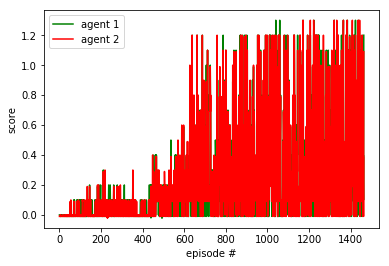

In [3]:
basic_params = Parameters()
train(basic_params)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
episode 1/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 2/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

/home/mexxik/.virtualenvs/drl-project-3/lib/python3.5/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


episode 3/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 4/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 5/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 6/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 7/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 8/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 9/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 10/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 11/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 12/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 13/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 14/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 15/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 16/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 17/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 18/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 19/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 20/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 21/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 22/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 23/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 24/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 25/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 26/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 27/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 28/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 29/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 30/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 31/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 32/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 33/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 34/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 35/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 36/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 37/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 38/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 39/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 40/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 41/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 42/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 43/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 44/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 45/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 46/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 47/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 48/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 49/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 50/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 51/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 52/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 53/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 54/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 55/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 56/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 57/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 58/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 59/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 60/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 61/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 62/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 63/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 64/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 65/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 66/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 67/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 68/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 69/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 70/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 71/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 72/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 73/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 74/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 75/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 76/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 77/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 78/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 79/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 80/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 81/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 82/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 83/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 84/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 85/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 86/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 87/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 88/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 89/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 90/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 91/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 92/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 93/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 94/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 95/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 96/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 97/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 98/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 99/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 100/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 101/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 102/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 103/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 104/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 105/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 106/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 107/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 108/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 109/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 110/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 111/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 112/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 113/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 114/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 115/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 116/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 117/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 118/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 119/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 120/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 121/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 122/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 123/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 124/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 125/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 126/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 127/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 128/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 129/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 130/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 131/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 132/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 133/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 134/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 135/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 136/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 137/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 138/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 139/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 140/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 141/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 142/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 143/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 144/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 145/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 146/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 147/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 148/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 149/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 150/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 151/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 152/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 153/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 154/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 155/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 156/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 157/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 158/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 159/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 160/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 161/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 162/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 163/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 164/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 165/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 166/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 167/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 168/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 169/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 170/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 171/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 172/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 173/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 174/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 175/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 176/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 177/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 178/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 179/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 180/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 181/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 182/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 183/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 184/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 185/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 186/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 187/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 188/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 189/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 190/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 191/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 192/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 193/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 194/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 195/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 196/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 197/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 198/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 199/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 200/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 201/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 202/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 203/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 204/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 205/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 206/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 207/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 208/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 209/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 210/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 211/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 212/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 213/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 214/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 215/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 216/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 217/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 218/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 219/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 220/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 221/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 222/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 223/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 224/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 225/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 226/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 227/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 228/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 229/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 230/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 231/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 232/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 233/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 234/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 235/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 236/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 237/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 238/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 239/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 240/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 241/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 242/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 243/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 244/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 245/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 246/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 247/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 248/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 249/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 250/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 251/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 252/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 253/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 254/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 255/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 256/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 257/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 258/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 259/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 260/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 261/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 262/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 263/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 264/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 265/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 266/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 267/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 268/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 269/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 270/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 271/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 272/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 273/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 274/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 275/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 276/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 277/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 278/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 279/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 280/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 281/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 282/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 283/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 284/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 285/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 286/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 287/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 288/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 289/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 290/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 291/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 292/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 293/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 294/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 295/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 296/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 297/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 298/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 299/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 300/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 301/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 302/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 303/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 304/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 305/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 306/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 307/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 308/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 309/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 310/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 311/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 312/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 313/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 314/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 315/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 316/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 317/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 318/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 319/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 320/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 321/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 322/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 323/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 324/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 325/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 326/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 327/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 328/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 329/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 330/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 331/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 332/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 333/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 334/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 335/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 336/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 337/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 338/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 339/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 340/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 341/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 342/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 343/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 344/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 345/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 346/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 347/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 348/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 349/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 350/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 351/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 352/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 353/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 354/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 355/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 356/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 357/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 358/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 359/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 360/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 361/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 362/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 363/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 364/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 365/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 366/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 367/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 368/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 369/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 370/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 371/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 372/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 373/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 374/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 375/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 376/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 377/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 378/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 379/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 380/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 381/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 382/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 383/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 384/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 385/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 386/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 387/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 388/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 389/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 390/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 391/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 392/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 393/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 394/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 395/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 396/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 397/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 398/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 399/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 400/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 401/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 402/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 403/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 404/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 405/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 406/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 407/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 408/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 409/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 410/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 411/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 412/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 413/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 414/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 415/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 416/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 417/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 418/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 419/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 420/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 421/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 422/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 423/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 424/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 425/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 426/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 427/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 428/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 429/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 430/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 431/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 432/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 433/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 434/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 435/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 436/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 437/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 438/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 439/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 440/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 441/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 442/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 443/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 444/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 445/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 446/2000, max score: 0.06, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 447/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 448/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 449/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 450/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 451/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 452/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 453/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 454/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 455/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 456/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 457/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 458/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 459/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 460/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 461/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 462/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 463/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 464/2000, max score: 0.06, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 465/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 466/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 467/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 468/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 469/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 470/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 471/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 472/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 473/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 474/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 475/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 476/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 477/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 478/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 479/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 480/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 481/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 482/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 483/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 484/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 485/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 486/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 487/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 488/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 489/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 490/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 491/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 492/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 493/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 494/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 495/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 496/2000, max score: 0.08, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 497/2000, max score: 0.08, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 498/2000, max score: 0.08, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 499/2000, max score: 0.08, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 500/2000, max score: 0.08, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 501/2000, max score: 0.08, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 502/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 503/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 504/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 505/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 506/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 507/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 508/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 509/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 510/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 511/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 512/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 513/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 514/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 515/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 516/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 517/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 518/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 519/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 520/2000, max score: 0.10, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 521/2000, max score: 0.10, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 522/2000, max score: 0.10, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 523/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 524/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 525/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 526/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 527/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 528/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 529/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 530/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 531/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 532/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 533/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 534/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 535/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 536/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 537/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 538/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 539/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 540/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 541/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 542/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 543/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 544/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 545/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 546/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 547/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 548/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 549/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 550/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 551/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 552/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 553/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 554/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 555/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 556/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 557/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 558/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 559/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 560/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 561/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 562/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 563/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 564/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 565/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 566/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 567/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 568/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 569/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 570/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 571/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 572/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 573/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 574/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 575/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 576/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 577/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 578/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 579/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 580/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 581/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 582/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 583/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 584/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 585/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 586/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 587/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 588/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 589/2000, max score: 0.13, average scores: agent 0 - 0.12, agent 1 - 0.13, 

episode 590/2000, max score: 0.13, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 591/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.12, 

episode 592/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 593/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 594/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 595/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 596/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 597/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 598/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 599/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 600/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 601/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 602/2000, max score: 0.14, average scores: agent 0 - 0.13, agent 1 - 0.14, 

episode 603/2000, max score: 0.14, average scores: agent 0 - 0.13, agent 1 - 0.14, 

episode 604/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 605/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 606/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 607/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 608/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 609/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 610/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 611/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 612/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 613/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 614/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 615/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 616/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 617/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 618/2000, max score: 0.15, average scores: agent 0 - 0.15, agent 1 - 0.15, 

episode 619/2000, max score: 0.15, average scores: agent 0 - 0.15, agent 1 - 0.15, 

episode 620/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 621/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 622/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 623/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 624/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 625/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 626/2000, max score: 0.15, average scores: agent 0 - 0.15, agent 1 - 0.15, 

episode 627/2000, max score: 0.16, average scores: agent 0 - 0.15, agent 1 - 0.16, 

episode 628/2000, max score: 0.16, average scores: agent 0 - 0.15, agent 1 - 0.16, 

episode 629/2000, max score: 0.16, average scores: agent 0 - 0.16, agent 1 - 0.16, 

episode 630/2000, max score: 0.16, average scores: agent 0 - 0.16, agent 1 - 0.16, 

episode 631/2000, max score: 0.17, average scores: agent 0 - 0.16, agent 1 - 0.17, 

episode 632/2000, max score: 0.17, average scores: agent 0 - 0.16, agent 1 - 0.17, 

episode 633/2000, max score: 0.17, average scores: agent 0 - 0.16, agent 1 - 0.17, 

episode 634/2000, max score: 0.17, average scores: agent 0 - 0.16, agent 1 - 0.17, 

episode 635/2000, max score: 0.18, average scores: agent 0 - 0.17, agent 1 - 0.18, 

episode 636/2000, max score: 0.18, average scores: agent 0 - 0.17, agent 1 - 0.18, 

episode 637/2000, max score: 0.18, average scores: agent 0 - 0.16, agent 1 - 0.18, 

episode 638/2000, max score: 0.18, average scores: agent 0 - 0.16, agent 1 - 0.18, 

episode 639/2000, max score: 0.19, average scores: agent 0 - 0.18, agent 1 - 0.19, 

episode 640/2000, max score: 0.19, average scores: agent 0 - 0.18, agent 1 - 0.19, 

episode 641/2000, max score: 0.19, average scores: agent 0 - 0.18, agent 1 - 0.19, 

episode 642/2000, max score: 0.19, average scores: agent 0 - 0.18, agent 1 - 0.19, 

episode 643/2000, max score: 0.19, average scores: agent 0 - 0.18, agent 1 - 0.19, 

episode 644/2000, max score: 0.19, average scores: agent 0 - 0.18, agent 1 - 0.19, 

episode 645/2000, max score: 0.20, average scores: agent 0 - 0.19, agent 1 - 0.20, 

episode 646/2000, max score: 0.20, average scores: agent 0 - 0.19, agent 1 - 0.20, 

episode 647/2000, max score: 0.20, average scores: agent 0 - 0.20, agent 1 - 0.20, 

episode 648/2000, max score: 0.21, average scores: agent 0 - 0.20, agent 1 - 0.21, 

episode 649/2000, max score: 0.21, average scores: agent 0 - 0.20, agent 1 - 0.21, 

episode 650/2000, max score: 0.21, average scores: agent 0 - 0.21, agent 1 - 0.21, 

episode 651/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 652/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 653/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 654/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 655/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 656/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 657/2000, max score: 0.22, average scores: agent 0 - 0.22, agent 1 - 0.22, 

episode 658/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 659/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 660/2000, max score: 0.23, average scores: agent 0 - 0.21, agent 1 - 0.23, 

episode 661/2000, max score: 0.23, average scores: agent 0 - 0.21, agent 1 - 0.23, 

episode 662/2000, max score: 0.23, average scores: agent 0 - 0.22, agent 1 - 0.23, 

episode 663/2000, max score: 0.24, average scores: agent 0 - 0.23, agent 1 - 0.24, 

episode 664/2000, max score: 0.24, average scores: agent 0 - 0.23, agent 1 - 0.24, 

episode 665/2000, max score: 0.24, average scores: agent 0 - 0.23, agent 1 - 0.24, 

episode 666/2000, max score: 0.25, average scores: agent 0 - 0.23, agent 1 - 0.25, 

episode 667/2000, max score: 0.25, average scores: agent 0 - 0.24, agent 1 - 0.25, 

episode 668/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.26, 

episode 669/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.26, 

episode 670/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.26, 

episode 671/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.25, 

episode 672/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.25, 

episode 673/2000, max score: 0.26, average scores: agent 0 - 0.23, agent 1 - 0.25, 

episode 674/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.25, 

episode 675/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.26, 

episode 676/2000, max score: 0.26, average scores: agent 0 - 0.24, agent 1 - 0.26, 

episode 677/2000, max score: 0.27, average scores: agent 0 - 0.25, agent 1 - 0.27, 

episode 678/2000, max score: 0.27, average scores: agent 0 - 0.25, agent 1 - 0.27, 

episode 679/2000, max score: 0.27, average scores: agent 0 - 0.25, agent 1 - 0.26, 

episode 680/2000, max score: 0.27, average scores: agent 0 - 0.25, agent 1 - 0.26, 

episode 681/2000, max score: 0.27, average scores: agent 0 - 0.25, agent 1 - 0.27, 

episode 682/2000, max score: 0.27, average scores: agent 0 - 0.25, agent 1 - 0.27, 

episode 683/2000, max score: 0.28, average scores: agent 0 - 0.26, agent 1 - 0.28, 

episode 684/2000, max score: 0.28, average scores: agent 0 - 0.27, agent 1 - 0.28, 

episode 685/2000, max score: 0.28, average scores: agent 0 - 0.26, agent 1 - 0.28, 

episode 686/2000, max score: 0.28, average scores: agent 0 - 0.27, agent 1 - 0.28, 

episode 687/2000, max score: 0.28, average scores: agent 0 - 0.27, agent 1 - 0.28, 

episode 688/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 689/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 690/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 691/2000, max score: 0.29, average scores: agent 0 - 0.27, agent 1 - 0.29, 

episode 692/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 693/2000, max score: 0.29, average scores: agent 0 - 0.27, agent 1 - 0.29, 

episode 694/2000, max score: 0.29, average scores: agent 0 - 0.27, agent 1 - 0.29, 

episode 695/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 696/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 697/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 698/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 699/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 700/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 701/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 702/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 703/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 704/2000, max score: 0.30, average scores: agent 0 - 0.29, agent 1 - 0.30, 

episode 705/2000, max score: 0.30, average scores: agent 0 - 0.29, agent 1 - 0.30, 

episode 706/2000, max score: 0.30, average scores: agent 0 - 0.29, agent 1 - 0.30, 

episode 707/2000, max score: 0.30, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 708/2000, max score: 0.31, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 709/2000, max score: 0.31, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 710/2000, max score: 0.31, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 711/2000, max score: 0.31, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 712/2000, max score: 0.31, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 713/2000, max score: 0.32, average scores: agent 0 - 0.31, agent 1 - 0.32, 

episode 714/2000, max score: 0.32, average scores: agent 0 - 0.31, agent 1 - 0.32, 

episode 715/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 716/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 717/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 718/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 719/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 720/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 721/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 722/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 723/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 724/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 725/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 726/2000, max score: 0.33, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 727/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.34, 

episode 728/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.34, 

episode 729/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.34, 

episode 730/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 731/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 732/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 733/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 734/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 735/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 736/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 737/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 738/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 739/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 740/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 741/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 742/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 743/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 744/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 745/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.30, 

episode 746/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.30, 

episode 747/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 748/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.29, 

episode 749/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.29, 

episode 750/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 751/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 752/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 753/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 754/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 755/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 756/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.29, 

episode 757/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 758/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 759/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.29, 

episode 760/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.29, 

episode 761/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.29, 

episode 762/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 763/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 764/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 765/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 766/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 767/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.26, 

episode 768/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 769/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.26, 

episode 770/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 771/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 772/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.27, 

episode 773/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 774/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 775/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.27, 

episode 776/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.27, 

episode 777/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.27, 

episode 778/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.27, 

episode 779/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 780/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.27, 

episode 781/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.27, 

episode 782/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 783/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 784/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 785/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 786/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 787/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 788/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 789/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 790/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 791/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 792/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 793/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 794/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 795/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 796/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 797/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 798/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 799/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 800/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.25, 

episode 801/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 802/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 803/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 804/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 805/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.26, 

episode 806/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.26, 

episode 807/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 808/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 809/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 810/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 811/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 812/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 813/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 814/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.24, 

episode 815/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 816/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 817/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 818/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.24, 

episode 819/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.24, 

episode 820/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.24, 

episode 821/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.24, 

episode 822/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 823/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 824/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 825/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 826/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.24, 

episode 827/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.23, 

episode 828/2000, max score: 0.34, average scores: agent 0 - 0.24, agent 1 - 0.23, 

episode 829/2000, max score: 0.34, average scores: agent 0 - 0.24, agent 1 - 0.23, 

episode 830/2000, max score: 0.34, average scores: agent 0 - 0.24, agent 1 - 0.23, 

episode 831/2000, max score: 0.34, average scores: agent 0 - 0.24, agent 1 - 0.23, 

episode 832/2000, max score: 0.34, average scores: agent 0 - 0.24, agent 1 - 0.23, 

episode 833/2000, max score: 0.34, average scores: agent 0 - 0.24, agent 1 - 0.23, 

episode 834/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 835/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 836/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 837/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 838/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 839/2000, max score: 0.34, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 840/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 841/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 842/2000, max score: 0.34, average scores: agent 0 - 0.26, agent 1 - 0.26, 

episode 843/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.26, 

episode 844/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.26, 

episode 845/2000, max score: 0.34, average scores: agent 0 - 0.27, agent 1 - 0.27, 

episode 846/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 847/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 848/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 849/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 850/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 851/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 852/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 853/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 854/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 855/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 856/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 857/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 858/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 859/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 860/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.28, 

episode 861/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.28, 

episode 862/2000, max score: 0.34, average scores: agent 0 - 0.28, agent 1 - 0.28, 

episode 863/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 864/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 865/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 866/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 867/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 868/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 869/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 870/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 871/2000, max score: 0.34, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 872/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 873/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 874/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 875/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 876/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 877/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 878/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 879/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.30, 

episode 880/2000, max score: 0.34, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 881/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 882/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 883/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 884/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 885/2000, max score: 0.34, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 886/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 887/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 888/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 889/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 890/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 891/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 892/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 893/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 894/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 895/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 896/2000, max score: 0.34, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 897/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 898/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 899/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 900/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 901/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 902/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 903/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 904/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 905/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 906/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 907/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 908/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 909/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 910/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 911/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 912/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 913/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 914/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 915/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 916/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 917/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 918/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 919/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 920/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 921/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 922/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 923/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 924/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 925/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 926/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 927/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 928/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 929/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 930/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 931/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 932/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 933/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 934/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 935/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 936/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 937/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 938/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 939/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 940/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 941/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 942/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 943/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 944/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 945/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 946/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 947/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 948/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 949/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 950/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 951/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 952/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 953/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 954/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 955/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 956/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 957/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 958/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 959/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 960/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 961/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 962/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 963/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 964/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 965/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 966/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 967/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 968/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 969/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 970/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 971/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 972/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 973/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 974/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 975/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 976/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 977/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 978/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 979/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 980/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.30, 

episode 981/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 982/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 983/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 984/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 985/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 986/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 987/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 988/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 989/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 990/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 991/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 992/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 993/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 994/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 995/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 996/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 997/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 998/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 999/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1000/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1001/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1002/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1003/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1004/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 1005/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 1006/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 1007/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 1008/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 1009/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.32, 

episode 1010/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1011/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1012/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1013/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 1014/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 1015/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 1016/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.35, 

episode 1017/2000, max score: 0.36, average scores: agent 0 - 0.35, agent 1 - 0.36, 

episode 1018/2000, max score: 0.36, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 1019/2000, max score: 0.36, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 1020/2000, max score: 0.36, average scores: agent 0 - 0.36, agent 1 - 0.36, 

episode 1021/2000, max score: 0.36, average scores: agent 0 - 0.36, agent 1 - 0.36, 

episode 1022/2000, max score: 0.36, average scores: agent 0 - 0.35, agent 1 - 0.36, 

episode 1023/2000, max score: 0.37, average scores: agent 0 - 0.36, agent 1 - 0.37, 

episode 1024/2000, max score: 0.38, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1025/2000, max score: 0.38, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1026/2000, max score: 0.38, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1027/2000, max score: 0.38, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1028/2000, max score: 0.38, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1029/2000, max score: 0.39, average scores: agent 0 - 0.38, agent 1 - 0.39, 

episode 1030/2000, max score: 0.39, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1031/2000, max score: 0.39, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1032/2000, max score: 0.40, average scores: agent 0 - 0.40, agent 1 - 0.40, 

episode 1033/2000, max score: 0.41, average scores: agent 0 - 0.40, agent 1 - 0.41, 

episode 1034/2000, max score: 0.41, average scores: agent 0 - 0.40, agent 1 - 0.40, 

episode 1035/2000, max score: 0.41, average scores: agent 0 - 0.40, agent 1 - 0.40, 

episode 1036/2000, max score: 0.41, average scores: agent 0 - 0.40, agent 1 - 0.40, 

episode 1037/2000, max score: 0.41, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1038/2000, max score: 0.41, average scores: agent 0 - 0.38, agent 1 - 0.39, 

episode 1039/2000, max score: 0.41, average scores: agent 0 - 0.38, agent 1 - 0.39, 

episode 1040/2000, max score: 0.41, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1041/2000, max score: 0.41, average scores: agent 0 - 0.40, agent 1 - 0.40, 

episode 1042/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1043/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1044/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1045/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1046/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1047/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1048/2000, max score: 0.42, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1049/2000, max score: 0.42, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1050/2000, max score: 0.42, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1051/2000, max score: 0.42, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1052/2000, max score: 0.42, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1053/2000, max score: 0.42, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1054/2000, max score: 0.42, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1055/2000, max score: 0.42, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1056/2000, max score: 0.42, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1057/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1058/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1059/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1060/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1061/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1062/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1063/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1064/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.44, 

episode 1065/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.44, 

episode 1066/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.44, 

episode 1067/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.44, 

episode 1068/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1069/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1070/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1071/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1072/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1073/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1074/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1075/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1076/2000, max score: 0.44, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1077/2000, max score: 0.44, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1078/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1079/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1080/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1081/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1082/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1083/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1084/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1085/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1086/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1087/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1088/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1089/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1090/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1091/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1092/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1093/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1094/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1095/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1096/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1097/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1098/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1099/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1100/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1101/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1102/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1103/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1104/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1105/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1106/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1107/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1108/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1109/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1110/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1111/2000, max score: 0.44, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1112/2000, max score: 0.44, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1113/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.40, 

episode 1114/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.40, 

episode 1115/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1116/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1117/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1118/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1119/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1120/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1121/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1122/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1123/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1124/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.36, 

episode 1125/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1126/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1127/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1128/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1129/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.36, 

episode 1130/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1131/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1132/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1133/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1134/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1135/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1136/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1137/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1138/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1139/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1140/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1141/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1142/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1143/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1144/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 1145/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1146/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1147/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1148/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1149/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1150/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1151/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1152/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1153/2000, max score: 0.44, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 1154/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1155/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1156/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1157/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1158/2000, max score: 0.44, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 1159/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1160/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1161/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1162/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1163/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1164/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 1165/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 1166/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1167/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1168/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1169/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1170/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1171/2000, max score: 0.44, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 1172/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1173/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1174/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.35, 

episode 1175/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.35, 

episode 1176/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1177/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1178/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.34, 

episode 1179/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1180/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.34, 

episode 1181/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.34, 

episode 1182/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.33, 

episode 1183/2000, max score: 0.44, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 1184/2000, max score: 0.44, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 1185/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1186/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1187/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1188/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1189/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1190/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 1191/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 1192/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1193/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1194/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1195/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1196/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1197/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1198/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1199/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1200/2000, max score: 0.44, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 1201/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1202/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1203/2000, max score: 0.44, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 1204/2000, max score: 0.44, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 1205/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 1206/2000, max score: 0.44, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 1207/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1208/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.35, 

episode 1209/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1210/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1211/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1212/2000, max score: 0.44, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 1213/2000, max score: 0.44, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 1214/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1215/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1216/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1217/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1218/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1219/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1220/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1221/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1222/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1223/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1224/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1225/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1226/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1227/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1228/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1229/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1230/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1231/2000, max score: 0.44, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1232/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1233/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1234/2000, max score: 0.44, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1235/2000, max score: 0.44, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1236/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1237/2000, max score: 0.44, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1238/2000, max score: 0.44, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1239/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1240/2000, max score: 0.44, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1241/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1242/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1243/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1244/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1245/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1246/2000, max score: 0.44, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1247/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1248/2000, max score: 0.44, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1249/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1250/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1251/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1252/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1253/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1254/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1255/2000, max score: 0.45, average scores: agent 0 - 0.45, agent 1 - 0.44, 

episode 1256/2000, max score: 0.45, average scores: agent 0 - 0.45, agent 1 - 0.44, 

episode 1257/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1258/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1259/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.42, 

episode 1260/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1261/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1262/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1263/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1264/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1265/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1266/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1267/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1268/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1269/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1270/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1271/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1272/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1273/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1274/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1275/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1276/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1277/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1278/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1279/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1280/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1281/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.41, 

episode 1282/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1283/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1284/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1285/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1286/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1287/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1288/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1289/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1290/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1291/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1292/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1293/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1294/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1295/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1296/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1297/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1298/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1299/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1300/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1301/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.42, 

episode 1302/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.42, 

episode 1303/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1304/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1305/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1306/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1307/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.40, 

episode 1308/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1309/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1310/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1311/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1312/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1313/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1314/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1315/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1316/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1317/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1318/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1319/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1320/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1321/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1322/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.40, 

episode 1323/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1324/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1325/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1326/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1327/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1328/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1329/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1330/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1331/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1332/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1333/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1334/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1335/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1336/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.38, 

episode 1337/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.39, 

episode 1338/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1339/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1340/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1341/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1342/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1343/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.39, 

episode 1344/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.38, 

episode 1345/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1346/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1347/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1348/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1349/2000, max score: 0.45, average scores: agent 0 - 0.36, agent 1 - 0.36, 

episode 1350/2000, max score: 0.45, average scores: agent 0 - 0.36, agent 1 - 0.36, 

episode 1351/2000, max score: 0.45, average scores: agent 0 - 0.36, agent 1 - 0.36, 

episode 1352/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1353/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1354/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1355/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1356/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1357/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1358/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1359/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1360/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1361/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.37, 

episode 1362/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1363/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1364/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1365/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1366/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1367/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1368/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1369/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.37, 

episode 1370/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1371/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1372/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1373/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1374/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1375/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1376/2000, max score: 0.45, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 1377/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.36, 

episode 1378/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.37, 

episode 1379/2000, max score: 0.45, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 1380/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.38, 

episode 1381/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.37, 

episode 1382/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1383/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1384/2000, max score: 0.45, average scores: agent 0 - 0.39, agent 1 - 0.38, 

episode 1385/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1386/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1387/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1388/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1389/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1390/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.40, 

episode 1391/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1392/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.40, 

episode 1393/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1394/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1395/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1396/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1397/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1398/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1399/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1400/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.38, 

episode 1401/2000, max score: 0.45, average scores: agent 0 - 0.40, agent 1 - 0.38, 

episode 1402/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.39, 

episode 1403/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1404/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.40, 

episode 1405/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.40, 

episode 1406/2000, max score: 0.45, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 1407/2000, max score: 0.45, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 1408/2000, max score: 0.45, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1409/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1410/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1411/2000, max score: 0.45, average scores: agent 0 - 0.44, agent 1 - 0.42, 

episode 1412/2000, max score: 0.45, average scores: agent 0 - 0.45, agent 1 - 0.44, 

episode 1413/2000, max score: 0.45, average scores: agent 0 - 0.45, agent 1 - 0.44, 

episode 1414/2000, max score: 0.45, average scores: agent 0 - 0.45, agent 1 - 0.45, 

episode 1415/2000, max score: 0.45, average scores: agent 0 - 0.45, agent 1 - 0.44, 

episode 1416/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.45, 

episode 1417/2000, max score: 0.46, average scores: agent 0 - 0.45, agent 1 - 0.44, 

episode 1418/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.45, 

episode 1419/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.45, 

episode 1420/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.46, 

episode 1421/2000, max score: 0.46, average scores: agent 0 - 0.45, agent 1 - 0.45, 

episode 1422/2000, max score: 0.46, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1423/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1424/2000, max score: 0.46, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1425/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1426/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1427/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1428/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1429/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1430/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 1431/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1432/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1433/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1434/2000, max score: 0.46, average scores: agent 0 - 0.42, agent 1 - 0.42, 

episode 1435/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1436/2000, max score: 0.46, average scores: agent 0 - 0.43, agent 1 - 0.43, 

episode 1437/2000, max score: 0.46, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 1438/2000, max score: 0.46, average scores: agent 0 - 0.44, agent 1 - 0.44, 

episode 1439/2000, max score: 0.46, average scores: agent 0 - 0.45, agent 1 - 0.45, 

episode 1440/2000, max score: 0.46, average scores: agent 0 - 0.45, agent 1 - 0.45, 

episode 1441/2000, max score: 0.46, average scores: agent 0 - 0.44, agent 1 - 0.44, 

episode 1442/2000, max score: 0.46, average scores: agent 0 - 0.45, agent 1 - 0.45, 

episode 1443/2000, max score: 0.46, average scores: agent 0 - 0.44, agent 1 - 0.44, 

episode 1444/2000, max score: 0.46, average scores: agent 0 - 0.45, agent 1 - 0.45, 

episode 1445/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.46, 

episode 1446/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.46, 

episode 1447/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.46, 

episode 1448/2000, max score: 0.47, average scores: agent 0 - 0.46, agent 1 - 0.47, 

episode 1449/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.47, 

episode 1450/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.47, 

episode 1451/2000, max score: 0.48, average scores: agent 0 - 0.48, agent 1 - 0.48, 

episode 1452/2000, max score: 0.48, average scores: agent 0 - 0.48, agent 1 - 0.48, 

episode 1453/2000, max score: 0.48, average scores: agent 0 - 0.48, agent 1 - 0.48, 

episode 1454/2000, max score: 0.49, average scores: agent 0 - 0.49, agent 1 - 0.49, 

episode 1455/2000, max score: 0.49, average scores: agent 0 - 0.48, agent 1 - 0.48, 

episode 1456/2000, max score: 0.49, average scores: agent 0 - 0.49, agent 1 - 0.49, 

episode 1457/2000, max score: 0.49, average scores: agent 0 - 0.49, agent 1 - 0.49, 

episode 1458/2000, max score: 0.50, average scores: agent 0 - 0.49, agent 1 - 0.50, 

episode 1459/2000, max score: 0.50, average scores: agent 0 - 0.49, agent 1 - 0.49, 

episode 1460/2000, max score: 0.50, average scores: agent 0 - 0.49, agent 1 - 0.49, 

episode 1461/2000, max score: 0.50, average scores: agent 0 - 0.49, agent 1 - 0.49, 

episode 1462/2000, max score: 0.50, average scores: agent 0 - 0.50, agent 1 - 0.50, 

episode 1463/2000, max score: 0.50, average scores: agent 0 - 0.50, agent 1 - 0.50, 

episode 1464/2000, max score: 0.51, average scores: agent 0 - 0.51, agent 1 - 0.51, 


solved in 1464 episodes


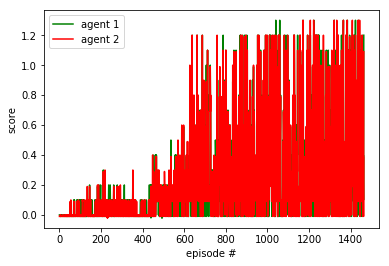

In [4]:
epsilon_params = Parameters()
epsilon_params.ENABLE_EPSILON = True
train(epsilon_params)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
episode 1/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

/home/mexxik/.virtualenvs/drl-project-3/lib/python3.5/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


episode 2/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 3/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 4/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 5/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 6/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 7/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 8/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 9/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 10/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 11/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 12/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 13/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 14/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 15/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 16/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 17/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 18/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 19/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 20/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 21/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 22/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 23/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 24/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 25/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 26/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 27/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 28/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 29/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 30/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 31/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 32/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 33/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 34/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 35/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 36/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 37/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 38/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 39/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 40/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 41/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 42/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 43/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 44/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 45/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 46/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 47/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 48/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 49/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 50/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 51/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 52/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 53/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 54/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 55/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 56/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 57/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 58/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 59/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 60/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 61/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 62/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 63/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 64/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 65/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 66/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 67/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 68/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 69/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 70/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 71/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 72/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 73/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 74/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 75/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 76/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 77/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 78/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 79/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 80/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 81/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 82/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 83/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 84/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 85/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 86/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 87/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 88/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 89/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 90/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 91/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 92/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 93/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 94/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 95/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 96/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 97/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 98/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 99/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 100/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 101/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 102/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 103/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 104/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 105/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 106/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 107/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 108/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 109/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 110/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 111/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 112/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 113/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 114/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 115/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 116/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 117/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 118/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 119/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 120/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 121/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 122/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 123/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 124/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 125/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 126/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 127/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 128/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 129/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 130/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 131/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 132/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 133/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 134/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 135/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 136/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 137/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 138/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 139/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 140/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 141/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 142/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 143/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 144/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 145/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 146/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 147/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 148/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 149/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 150/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 151/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 152/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 153/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 154/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 155/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 156/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 157/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 158/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 159/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 160/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 161/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 162/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 163/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 164/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 165/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 166/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 167/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 168/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 169/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 170/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 171/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 172/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 173/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 174/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 175/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 176/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 177/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 178/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 179/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 180/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 181/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 182/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 183/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 184/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 185/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 186/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 187/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 188/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 189/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 190/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 191/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 192/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 193/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 194/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 195/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 196/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 197/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 198/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 199/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 200/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 201/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 202/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 203/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 204/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 205/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 206/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 207/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 208/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 209/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 210/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 211/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 212/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 213/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 214/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 215/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 216/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 217/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 218/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 219/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 220/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 221/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 222/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 223/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 224/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 225/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 226/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 227/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 228/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 229/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 230/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 231/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 232/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 233/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 234/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 235/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 236/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 237/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 238/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 239/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 240/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 241/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 242/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 243/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 244/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 245/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 246/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 247/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 248/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 249/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 250/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 251/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 252/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 253/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 254/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 255/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 256/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 257/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 258/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 259/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 260/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 261/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 262/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 263/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 264/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 265/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 266/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 267/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 268/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 269/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 270/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 271/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 272/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 273/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 274/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 275/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 276/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 277/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 278/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 279/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 280/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 281/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 282/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 283/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 284/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 285/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 286/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 287/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 288/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 289/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 290/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 291/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 292/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 293/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 294/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 295/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 296/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 297/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 298/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 299/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 300/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 301/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 302/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 303/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 304/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 305/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 306/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 307/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 308/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 309/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 310/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 311/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 312/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 313/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 314/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 315/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 316/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 317/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 318/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 319/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 320/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 321/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 322/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 323/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 324/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 325/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 326/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 327/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 328/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 329/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 330/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 331/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 332/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 333/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 334/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 335/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 336/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 337/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 338/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 339/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 340/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 341/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 342/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 343/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 344/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 345/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 346/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 347/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 348/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 349/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 350/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 351/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 352/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 353/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 354/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 355/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 356/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 357/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 358/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 359/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 360/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 361/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 362/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 363/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 364/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 365/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 366/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 367/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 368/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 369/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 370/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 371/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 372/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 373/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 374/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 375/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 376/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 377/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 378/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 379/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 380/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 381/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 382/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 383/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 384/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 385/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 386/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 387/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 388/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 389/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 390/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 391/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 392/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 393/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 394/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 395/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 396/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 397/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 398/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 399/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 400/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 401/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 402/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 403/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 404/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 405/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 406/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 407/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 408/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 409/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 410/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 411/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 412/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 413/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 414/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 415/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 416/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 417/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 418/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 419/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 420/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 421/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 422/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 423/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 424/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 425/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 426/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 427/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 428/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 429/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 430/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 431/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 432/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 433/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 434/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 435/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 436/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 437/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 438/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 439/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 440/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 441/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 442/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 443/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 444/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 445/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 446/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 447/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 448/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 449/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 450/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 451/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 452/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 453/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 454/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 455/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 456/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 457/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 458/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 459/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 460/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 461/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 462/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 463/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 464/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 465/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 466/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 467/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 468/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 469/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 470/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 471/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 472/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 473/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 474/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 475/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 476/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 477/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 478/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 479/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 480/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 481/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 482/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 483/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 484/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 485/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 486/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 487/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 488/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 489/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 490/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 491/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 492/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 493/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 494/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 495/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 496/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 497/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 498/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 499/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 500/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 501/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 502/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 503/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 504/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 505/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 506/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 507/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 508/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 509/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 510/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 511/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 512/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 513/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 514/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 515/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 516/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 517/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 518/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 519/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 520/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 521/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 522/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 523/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 524/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 525/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 526/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 527/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 528/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 529/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 530/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 531/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 532/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 533/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 534/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 535/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 536/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 537/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 538/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 539/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 540/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 541/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 542/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 543/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 544/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 545/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 546/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 547/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 548/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 549/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 550/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 551/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 552/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 553/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 554/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 555/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 556/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 557/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 558/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 559/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 560/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 561/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 562/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 563/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 564/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 565/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 566/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 567/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 568/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 569/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 570/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 571/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 572/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 573/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 574/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 575/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 576/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 577/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 578/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 579/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 580/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 581/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 582/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 583/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 584/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 585/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 586/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 587/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 588/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 589/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 590/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 591/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 592/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 593/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 594/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 595/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 596/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 597/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 598/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 599/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 600/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 601/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 602/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 603/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 604/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 605/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 606/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 607/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 608/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 609/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 610/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 611/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 612/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 613/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 614/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 615/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 616/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 617/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 618/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 619/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 620/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 621/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 622/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 623/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 624/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 625/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 626/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 627/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 628/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 629/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 630/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 631/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 632/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 633/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 634/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 635/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 636/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 637/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.08, 

episode 638/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 639/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 640/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 641/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 642/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 643/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 644/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 645/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 646/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 647/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 648/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 649/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 650/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 651/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 652/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 653/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 654/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 655/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 656/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.08, 

episode 657/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 658/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.08, 

episode 659/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.08, 

episode 660/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 661/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 662/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 663/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 664/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 665/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 666/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.08, 

episode 667/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.08, 

episode 668/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 669/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.08, 

episode 670/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 671/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.08, 

episode 672/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 673/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 674/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 675/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 676/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 677/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.08, 

episode 678/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 679/2000, max score: 0.09, average scores: agent 0 - 0.06, agent 1 - 0.08, 

episode 680/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 681/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 682/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 683/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 684/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 685/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 686/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 687/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 688/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 689/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 690/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 691/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 692/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 693/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 694/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 695/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 696/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 697/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 698/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 699/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 700/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 701/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 702/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 703/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 704/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 705/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 706/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 707/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 708/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 709/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 710/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 711/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 712/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 713/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 714/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 715/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 716/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 717/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 718/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 719/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 720/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 721/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 722/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 723/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 724/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 725/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 726/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 727/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 728/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 729/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 730/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 731/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 732/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 733/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 734/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 735/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 736/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 737/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 738/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 739/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 740/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 741/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 742/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 743/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 744/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 745/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 746/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 747/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 748/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 749/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 750/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 751/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 752/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 753/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 754/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 755/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 756/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 757/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 758/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 759/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 760/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 761/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 762/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 763/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 764/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 765/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 766/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 767/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 768/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 769/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 770/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 771/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 772/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 773/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 774/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 775/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 776/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 777/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 778/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 779/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 780/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 781/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 782/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 783/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 784/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 785/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 786/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 787/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 788/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 789/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 790/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 791/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 792/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 793/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 794/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 795/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 796/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 797/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 798/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 799/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 800/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 801/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 802/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 803/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 804/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 805/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 806/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 807/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 808/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 809/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 810/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 811/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 812/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 813/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 814/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 815/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 816/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 817/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 818/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 819/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 820/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 821/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 822/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 823/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 824/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 825/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 826/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 827/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 828/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 829/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 830/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 831/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 832/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 833/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 834/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 835/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 836/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 837/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 838/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 839/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 840/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 841/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 842/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 843/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 844/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 845/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 846/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 847/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 848/2000, max score: 0.09, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 849/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 850/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 851/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 852/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 853/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 854/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 855/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 856/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 857/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 858/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 859/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 860/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 861/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 862/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 863/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 864/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 865/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 866/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 867/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 868/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 869/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 870/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 871/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 872/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 873/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 874/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 875/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 876/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 877/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 878/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 879/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 880/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 881/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 882/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 883/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 884/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 885/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 886/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 887/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 888/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 889/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 890/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 891/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 892/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 893/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 894/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 895/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 896/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 897/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 898/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 899/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 900/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 901/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 902/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 903/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 904/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 905/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 906/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 907/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 908/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 909/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 910/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 911/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 912/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 913/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 914/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 915/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 916/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 917/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 918/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 919/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 920/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 921/2000, max score: 0.09, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 922/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 923/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 924/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 925/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 926/2000, max score: 0.10, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 927/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.09, 

episode 928/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.09, 

episode 929/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.09, 

episode 930/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.09, 

episode 931/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 932/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 933/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 934/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 935/2000, max score: 0.11, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 936/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.10, 

episode 937/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.11, 

episode 938/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.12, 

episode 939/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.12, 

episode 940/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.12, 

episode 941/2000, max score: 0.14, average scores: agent 0 - 0.14, agent 1 - 0.12, 

episode 942/2000, max score: 0.15, average scores: agent 0 - 0.15, agent 1 - 0.13, 

episode 943/2000, max score: 0.15, average scores: agent 0 - 0.15, agent 1 - 0.13, 

episode 944/2000, max score: 0.15, average scores: agent 0 - 0.15, agent 1 - 0.13, 

episode 945/2000, max score: 0.15, average scores: agent 0 - 0.15, agent 1 - 0.13, 

episode 946/2000, max score: 0.15, average scores: agent 0 - 0.15, agent 1 - 0.13, 

episode 947/2000, max score: 0.16, average scores: agent 0 - 0.16, agent 1 - 0.14, 

episode 948/2000, max score: 0.16, average scores: agent 0 - 0.16, agent 1 - 0.14, 

episode 949/2000, max score: 0.16, average scores: agent 0 - 0.16, agent 1 - 0.14, 

episode 950/2000, max score: 0.16, average scores: agent 0 - 0.16, agent 1 - 0.14, 

episode 951/2000, max score: 0.17, average scores: agent 0 - 0.17, agent 1 - 0.15, 

episode 952/2000, max score: 0.18, average scores: agent 0 - 0.18, agent 1 - 0.17, 

episode 953/2000, max score: 0.19, average scores: agent 0 - 0.19, agent 1 - 0.17, 

episode 954/2000, max score: 0.20, average scores: agent 0 - 0.20, agent 1 - 0.18, 

episode 955/2000, max score: 0.20, average scores: agent 0 - 0.20, agent 1 - 0.19, 

episode 956/2000, max score: 0.20, average scores: agent 0 - 0.20, agent 1 - 0.19, 

episode 957/2000, max score: 0.21, average scores: agent 0 - 0.21, agent 1 - 0.19, 

episode 958/2000, max score: 0.22, average scores: agent 0 - 0.22, agent 1 - 0.20, 

episode 959/2000, max score: 0.23, average scores: agent 0 - 0.23, agent 1 - 0.21, 

episode 960/2000, max score: 0.23, average scores: agent 0 - 0.23, agent 1 - 0.22, 

episode 961/2000, max score: 0.23, average scores: agent 0 - 0.23, agent 1 - 0.22, 

episode 962/2000, max score: 0.24, average scores: agent 0 - 0.24, agent 1 - 0.23, 

episode 963/2000, max score: 0.24, average scores: agent 0 - 0.24, agent 1 - 0.23, 

episode 964/2000, max score: 0.25, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 965/2000, max score: 0.25, average scores: agent 0 - 0.25, agent 1 - 0.24, 

episode 966/2000, max score: 0.26, average scores: agent 0 - 0.26, agent 1 - 0.25, 

episode 967/2000, max score: 0.27, average scores: agent 0 - 0.27, agent 1 - 0.26, 

episode 968/2000, max score: 0.28, average scores: agent 0 - 0.28, agent 1 - 0.27, 

episode 969/2000, max score: 0.29, average scores: agent 0 - 0.29, agent 1 - 0.28, 

episode 970/2000, max score: 0.30, average scores: agent 0 - 0.30, agent 1 - 0.29, 

episode 971/2000, max score: 0.31, average scores: agent 0 - 0.31, agent 1 - 0.30, 

episode 972/2000, max score: 0.32, average scores: agent 0 - 0.32, agent 1 - 0.31, 

episode 973/2000, max score: 0.33, average scores: agent 0 - 0.33, agent 1 - 0.32, 

episode 974/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 975/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.33, 

episode 976/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 977/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 978/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 979/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 980/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 981/2000, max score: 0.35, average scores: agent 0 - 0.35, agent 1 - 0.34, 

episode 982/2000, max score: 0.36, average scores: agent 0 - 0.36, agent 1 - 0.35, 

episode 983/2000, max score: 0.37, average scores: agent 0 - 0.37, agent 1 - 0.35, 

episode 984/2000, max score: 0.37, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 985/2000, max score: 0.37, average scores: agent 0 - 0.37, agent 1 - 0.36, 

episode 986/2000, max score: 0.38, average scores: agent 0 - 0.38, agent 1 - 0.37, 

episode 987/2000, max score: 0.40, average scores: agent 0 - 0.40, agent 1 - 0.38, 

episode 988/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 989/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 990/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 991/2000, max score: 0.41, average scores: agent 0 - 0.41, agent 1 - 0.40, 

episode 992/2000, max score: 0.42, average scores: agent 0 - 0.42, agent 1 - 0.41, 

episode 993/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 994/2000, max score: 0.43, average scores: agent 0 - 0.43, agent 1 - 0.42, 

episode 995/2000, max score: 0.44, average scores: agent 0 - 0.44, agent 1 - 0.43, 

episode 996/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.44, 

episode 997/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.44, 

episode 998/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.45, 

episode 999/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.45, 

episode 1000/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.45, 

episode 1001/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.44, 

episode 1002/2000, max score: 0.46, average scores: agent 0 - 0.46, agent 1 - 0.45, 

episode 1003/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.46, 

episode 1004/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.46, 

episode 1005/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.46, 

episode 1006/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.46, 

episode 1007/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.46, 

episode 1008/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.46, 

episode 1009/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.46, 

episode 1010/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.46, 

episode 1011/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.46, 

episode 1012/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.46, 

episode 1013/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.46, 

episode 1014/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.46, 

episode 1015/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.47, 

episode 1016/2000, max score: 0.47, average scores: agent 0 - 0.47, agent 1 - 0.47, 

episode 1017/2000, max score: 0.48, average scores: agent 0 - 0.48, agent 1 - 0.48, 

episode 1018/2000, max score: 0.49, average scores: agent 0 - 0.49, agent 1 - 0.48, 

episode 1019/2000, max score: 0.49, average scores: agent 0 - 0.49, agent 1 - 0.49, 

episode 1020/2000, max score: 0.50, average scores: agent 0 - 0.50, agent 1 - 0.49, 

episode 1021/2000, max score: 0.50, average scores: agent 0 - 0.50, agent 1 - 0.49, 

episode 1022/2000, max score: 0.51, average scores: agent 0 - 0.51, agent 1 - 0.50, 


solved in 1022 episodes


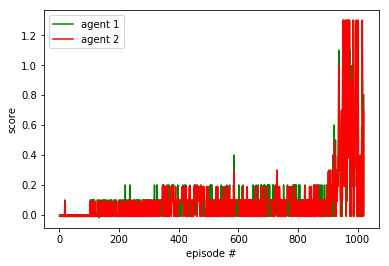

In [3]:
interval_params = Parameters()
interval_params.LEARN_EVERY = 4
train(interval_params)

In [3]:
interval_params_2 = Parameters()
interval_params_2.LEARN_EVERY = 20
interval_params_2.LEARN_NUM = 10
train(interval_params_2)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
episode 1/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

/home/mexxik/.virtualenvs/drl-project-3/lib/python3.5/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


episode 2/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 3/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 4/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 5/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 6/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 7/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 8/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 9/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 10/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 11/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 12/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 13/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 14/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 15/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 16/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 17/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 18/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 19/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 20/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 21/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 22/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 23/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 24/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 25/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 26/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 27/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 28/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 29/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 30/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 31/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 32/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 33/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 34/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 35/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 36/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 37/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 38/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 39/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 40/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 41/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 42/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 43/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 44/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 45/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 46/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 47/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 48/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 49/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 50/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 51/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 52/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 53/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 54/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 55/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 56/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 57/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 58/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 59/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 60/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 61/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 62/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.01, 

episode 63/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 64/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 65/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 66/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 67/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.01, 

episode 68/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.01, 

episode 69/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.01, 

episode 70/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.01, 

episode 71/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.01, 

episode 72/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.01, 

episode 73/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.01, 

episode 74/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.01, 

episode 75/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 76/2000, max score: 0.01, average scores: agent 0 - 0.00, agent 1 - 0.01, 

episode 77/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 78/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 79/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 80/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 81/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 82/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 83/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 84/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 85/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 86/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 87/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 88/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 89/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 90/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 91/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 92/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 93/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 94/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 95/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 96/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 97/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 98/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 99/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 100/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 101/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 102/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 103/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 104/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 105/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 106/2000, max score: 0.02, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 107/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 108/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 109/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 110/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 111/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 112/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 113/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 114/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 115/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 116/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 117/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 118/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 119/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 120/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 121/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 122/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 123/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 124/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 125/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 126/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 127/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 128/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 129/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 130/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 131/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 132/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 133/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 134/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 135/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 136/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 137/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 138/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 139/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 140/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 141/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 142/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 143/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 144/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 145/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 146/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 147/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 148/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 149/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 150/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 151/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 152/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 153/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 154/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 155/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 156/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 157/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 158/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 159/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 160/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 161/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 162/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 163/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 164/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 165/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 166/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 167/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 168/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 169/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 170/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 171/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 172/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 173/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 174/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 175/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 176/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 177/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 178/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 179/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 180/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 181/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 182/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 183/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 184/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 185/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 186/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 187/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 188/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 189/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 190/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 191/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 192/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 193/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 194/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 195/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 196/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 197/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 198/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 199/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 200/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 201/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 202/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 203/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 204/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 205/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 206/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 207/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 208/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 209/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 210/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 211/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 212/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 213/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 214/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 215/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 216/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 217/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 218/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 219/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 220/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 221/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 222/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 223/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 224/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 225/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 226/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 227/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 228/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 229/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 230/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 231/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 232/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 233/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 234/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 235/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 236/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 237/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 238/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 239/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 240/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 241/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 242/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 243/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 244/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 245/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 246/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 247/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 248/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 249/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 250/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 251/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 252/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 253/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 254/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 255/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 256/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 257/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 258/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 259/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 260/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 261/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 262/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 263/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 264/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 265/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 266/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 267/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 268/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 269/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 270/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 271/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 272/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 273/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 274/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 275/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 276/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 277/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 278/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 279/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 280/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 281/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 282/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 283/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 284/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 285/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 286/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 287/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 288/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 289/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 290/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 291/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 292/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 293/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 294/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 295/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 296/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 297/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.05, 

episode 298/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.05, 

episode 299/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.05, 

episode 300/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.05, 

episode 301/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.05, 

episode 302/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 303/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.05, 

episode 304/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.05, 

episode 305/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 306/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 307/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 308/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 309/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 310/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 311/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 312/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 313/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 314/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 315/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 316/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 317/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 318/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 319/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 320/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 321/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 322/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 323/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 324/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 325/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 326/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 327/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 328/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 329/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 330/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 331/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 332/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 333/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 334/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 335/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 336/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 337/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 338/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 339/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 340/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 341/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 342/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 343/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 344/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 345/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 346/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 347/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 348/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 349/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 350/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 351/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 352/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 353/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 354/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 355/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 356/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 357/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 358/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 359/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 360/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 361/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 362/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 363/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 364/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 365/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 366/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 367/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 368/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 369/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 370/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 371/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 372/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 373/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 374/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 375/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 376/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 377/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 378/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 379/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 380/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 381/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 382/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 383/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 384/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 385/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 386/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 387/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 388/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 389/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 390/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 391/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 392/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 393/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 394/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.02, 

episode 395/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 396/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 397/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 398/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 399/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 400/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 401/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 402/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 403/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 404/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 405/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 406/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 407/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 408/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 409/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 410/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 411/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 412/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 413/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 414/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 415/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 416/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 417/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 418/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 419/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 420/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 421/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 422/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 423/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 424/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 425/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 426/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 427/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 428/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 429/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 430/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 431/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 432/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 433/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 434/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 435/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 436/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 437/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 438/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 439/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 440/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 441/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 442/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 443/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 444/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 445/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 446/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 447/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 448/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 449/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 450/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 451/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 452/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 453/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 454/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 455/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 456/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 457/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 458/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 459/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 460/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 461/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 462/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 463/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 464/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 465/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 466/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 467/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 468/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 469/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 470/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 471/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 472/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 473/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 474/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 475/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 476/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 477/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 478/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 479/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 480/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 481/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 482/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 483/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 484/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 485/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 486/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 487/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 488/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 489/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 490/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.02, 

episode 491/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 492/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 493/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 494/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 495/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 496/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 497/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 498/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 499/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 500/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 501/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 502/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 503/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 504/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 505/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 506/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 507/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 508/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 509/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 510/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 511/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 512/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 513/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 514/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 515/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 516/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 517/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 518/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 519/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 520/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 521/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 522/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 523/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 524/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 525/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 526/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 527/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 528/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 529/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 530/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 531/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 532/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 533/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 534/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 535/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 536/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 537/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 538/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 539/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 540/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 541/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 542/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 543/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 544/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 545/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 546/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 547/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 548/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 549/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 550/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 551/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 552/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 553/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 554/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 555/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 556/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 557/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 558/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 559/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 560/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 561/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 562/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 563/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 564/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 565/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 566/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 567/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 568/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 569/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 570/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 571/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 572/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 573/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 574/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 575/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 576/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 577/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 578/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 579/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 580/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 581/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 582/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 583/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 584/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 585/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 586/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 587/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 588/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 589/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 590/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 591/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 592/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 593/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 594/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 595/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 596/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 597/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 598/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 599/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 600/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 601/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 602/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 603/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 604/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 605/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 606/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 607/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 608/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 609/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 610/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 611/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 612/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 613/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 614/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 615/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 616/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 617/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 618/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 619/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 620/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 621/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 622/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 623/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 624/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 625/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 626/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 627/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 628/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 629/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 630/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 631/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 632/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 633/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 634/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 635/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 636/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 637/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 638/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 639/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 640/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 641/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 642/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 643/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 644/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 645/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 646/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 647/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 648/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 649/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 650/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 651/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 652/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 653/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 654/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 655/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 656/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 657/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 658/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 659/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 660/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 661/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 662/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 663/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 664/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 665/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 666/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 667/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 668/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 669/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 670/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 671/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 672/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 673/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 674/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 675/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 676/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 677/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 678/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 679/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 680/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 681/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 682/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 683/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 684/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 685/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 686/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 687/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 688/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 689/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 690/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 691/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 692/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 693/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 694/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 695/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 696/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 697/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 698/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 699/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 700/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 701/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 702/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 703/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 704/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 705/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 706/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 707/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 708/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 709/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 710/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 711/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 712/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 713/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 714/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 715/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 716/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 717/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 718/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 719/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 720/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 721/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 722/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 723/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 724/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 725/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 726/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 727/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 728/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 729/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 730/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 731/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 732/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 733/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 734/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 735/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 736/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 737/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 738/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 739/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 740/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 741/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 742/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 743/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 744/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 745/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 746/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 747/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 748/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 749/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 750/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 751/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 752/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 753/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 754/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 755/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 756/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 757/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 758/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 759/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 760/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 761/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 762/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 763/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 764/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 765/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 766/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 767/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 768/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 769/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 770/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 771/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 772/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 773/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 774/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 775/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 776/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 777/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 778/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 779/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 780/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 781/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 782/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 783/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 784/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 785/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 786/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 787/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 788/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 789/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 790/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 791/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 792/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 793/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 794/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 795/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 796/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 797/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 798/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 799/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 800/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 801/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 802/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 803/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 804/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 805/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 806/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 807/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 808/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 809/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 810/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 811/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 812/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 813/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 814/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 815/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 816/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 817/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 818/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 819/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 820/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 821/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 822/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 823/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 824/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 825/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 826/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 827/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 828/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 829/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 830/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 831/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 832/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 833/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 834/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 835/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 836/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 837/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 838/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 839/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 840/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 841/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 842/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 843/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 844/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 845/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 846/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 847/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 848/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 849/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 850/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 851/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 852/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 853/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 854/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 855/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 856/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 857/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 858/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 859/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 860/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 861/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 862/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 863/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 864/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 865/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 866/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 867/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 868/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 869/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 870/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 871/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 872/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 873/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 874/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 875/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 876/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 877/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 878/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 879/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 880/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 881/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 882/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 883/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 884/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 885/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 886/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 887/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 888/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 889/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 890/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 891/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 892/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 893/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 894/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 895/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 896/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 897/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 898/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 899/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 900/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 901/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 902/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 903/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 904/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 905/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 906/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 907/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 908/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 909/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 910/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 911/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 912/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 913/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 914/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 915/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 916/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 917/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 918/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 919/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 920/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 921/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 922/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 923/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 924/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 925/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 926/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 927/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 928/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 929/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 930/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 931/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 932/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 933/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 934/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 935/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 936/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 937/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 938/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 939/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 940/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 941/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 942/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 943/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 944/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 945/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 946/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 947/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 948/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 949/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 950/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 951/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 952/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 953/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 954/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 955/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 956/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 957/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 958/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 959/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 960/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 961/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 962/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 963/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 964/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 965/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 966/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 967/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 968/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 969/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 970/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 971/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 972/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 973/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 974/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 975/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 976/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 977/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 978/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 979/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 980/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 981/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 982/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 983/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 984/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 985/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 986/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 987/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 988/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 989/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 990/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 991/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 992/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 993/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 994/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 995/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 996/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 997/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 998/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 999/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 1000/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 1001/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 1002/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 1003/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 1004/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 1005/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 1006/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 1007/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 1008/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 1009/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 1010/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 1011/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 1012/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 1013/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 1014/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 1015/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 1016/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 1017/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 1018/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 1019/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 1020/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 1021/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 1022/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 1023/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 1024/2000, max score: 0.05, average scores: agent 0 - -0.00, agent 1 - 0.00, 

episode 1025/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1026/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1027/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1028/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1029/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1030/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1031/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1032/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1033/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1034/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1035/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1036/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1037/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1038/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1039/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1040/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1041/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1042/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1043/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1044/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1045/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1046/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1047/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1048/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1049/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1050/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1051/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1052/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1053/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1054/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1055/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1056/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1057/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1058/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1059/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1060/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1061/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1062/2000, max score: 0.05, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 1063/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 1064/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 1065/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 1066/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 1067/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 1068/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 1069/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 1070/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 1071/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 1072/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 1073/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 1074/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 1075/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 1076/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 1077/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1078/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1079/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1080/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1081/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1082/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1083/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1084/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1085/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1086/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1087/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1088/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1089/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1090/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1091/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1092/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1093/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1094/2000, max score: 0.05, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 1095/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 1096/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 1097/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 1098/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1099/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1100/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1101/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1102/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1103/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1104/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1105/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1106/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1107/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1108/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1109/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1110/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1111/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1112/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 1113/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 1114/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 1115/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 1116/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 1117/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1118/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1119/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1120/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1121/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1122/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1123/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1124/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1125/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1126/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1127/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1128/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1129/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1130/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1131/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1132/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1133/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1134/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1135/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1136/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1137/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1138/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1139/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1140/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1141/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1142/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1143/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1144/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1145/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1146/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1147/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 1148/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 1149/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 1150/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1151/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1152/2000, max score: 0.05, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 1153/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 1154/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 1155/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 1156/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 1157/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 1158/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 1159/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 1160/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 1161/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1162/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1163/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1164/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1165/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1166/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1167/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1168/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1169/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1170/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1171/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1172/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1173/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1174/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1175/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1176/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1177/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1178/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1179/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1180/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1181/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1182/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1183/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1184/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1185/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1186/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1187/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1188/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1189/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1190/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1191/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1192/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1193/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1194/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1195/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1196/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1197/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1198/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1199/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1200/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1201/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1202/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1203/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1204/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1205/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1206/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1207/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1208/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1209/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1210/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1211/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1212/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1213/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1214/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1215/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1216/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1217/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1218/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1219/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1220/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1221/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1222/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1223/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1224/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1225/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1226/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1227/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1228/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1229/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1230/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1231/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1232/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1233/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1234/2000, max score: 0.05, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1235/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1236/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1237/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1238/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1239/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1240/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1241/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1242/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1243/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1244/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1245/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1246/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1247/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1248/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1249/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1250/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1251/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1252/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 1253/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1254/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1255/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1256/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1257/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1258/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1259/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1260/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1261/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1262/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1263/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1264/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1265/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1266/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.03, 

episode 1267/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1268/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1269/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1270/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1271/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1272/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1273/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1274/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1275/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1276/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1277/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1278/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1279/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1280/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1281/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1282/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1283/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1284/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1285/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1286/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1287/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1288/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1289/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1290/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1291/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1292/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1293/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1294/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1295/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1296/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1297/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1298/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1299/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1300/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1301/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1302/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1303/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1304/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1305/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1306/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1307/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1308/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1309/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1310/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1311/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1312/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1313/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1314/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1315/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1316/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1317/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1318/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1319/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1320/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1321/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1322/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1323/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1324/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1325/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1326/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1327/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1328/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1329/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1330/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1331/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1332/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1333/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1334/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1335/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1336/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1337/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1338/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1339/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1340/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1341/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1342/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1343/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1344/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1345/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1346/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1347/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1348/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1349/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1350/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1351/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1352/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1353/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1354/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1355/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1356/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1357/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1358/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1359/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1360/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1361/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1362/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1363/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1364/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1365/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1366/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1367/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1368/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1369/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1370/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1371/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1372/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1373/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1374/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1375/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1376/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1377/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1378/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1379/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1380/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1381/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1382/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1383/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1384/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1385/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1386/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1387/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1388/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1389/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1390/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1391/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1392/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1393/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1394/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1395/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1396/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1397/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1398/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1399/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1400/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1401/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1402/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1403/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1404/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1405/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1406/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1407/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1408/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1409/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1410/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1411/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1412/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1413/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1414/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1415/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1416/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1417/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1418/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1419/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1420/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1421/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1422/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1423/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1424/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1425/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1426/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1427/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1428/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1429/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1430/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1431/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1432/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1433/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1434/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1435/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1436/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1437/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1438/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1439/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1440/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1441/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1442/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1443/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1444/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1445/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1446/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1447/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1448/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1449/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1450/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1451/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1452/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1453/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1454/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1455/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1456/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1457/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1458/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1459/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1460/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1461/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1462/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1463/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1464/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1465/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1466/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1467/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1468/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1469/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1470/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1471/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1472/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1473/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1474/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1475/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1476/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1477/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1478/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1479/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1480/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1481/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1482/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1483/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1484/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1485/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1486/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1487/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1488/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1489/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1490/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1491/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1492/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1493/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1494/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1495/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1496/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1497/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1498/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1499/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1500/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1501/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1502/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1503/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1504/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1505/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1506/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1507/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1508/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1509/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1510/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1511/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1512/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1513/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1514/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1515/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1516/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1517/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1518/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1519/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1520/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1521/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1522/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1523/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1524/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1525/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1526/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1527/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1528/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1529/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1530/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1531/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1532/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1533/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1534/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1535/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1536/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1537/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1538/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1539/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1540/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1541/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1542/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1543/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1544/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1545/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1546/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1547/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1548/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1549/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1550/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1551/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1552/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1553/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1554/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1555/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1556/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1557/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1558/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1559/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1560/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1561/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1562/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1563/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1564/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1565/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1566/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1567/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1568/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1569/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1570/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1571/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1572/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1573/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1574/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1575/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1576/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1577/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1578/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1579/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1580/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1581/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1582/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1583/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1584/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1585/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1586/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1587/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1588/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1589/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1590/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1591/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1592/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1593/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1594/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1595/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1596/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1597/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1598/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1599/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1600/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1601/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1602/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1603/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1604/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1605/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1606/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1607/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1608/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1609/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1610/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1611/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1612/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1613/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1614/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1615/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1616/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1617/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1618/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1619/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1620/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1621/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1622/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1623/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1624/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1625/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1626/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1627/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1628/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1629/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1630/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1631/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1632/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1633/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1634/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1635/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1636/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1637/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1638/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1639/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1640/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1641/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1642/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1643/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1644/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1645/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1646/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1647/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1648/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1649/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1650/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1651/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1652/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1653/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1654/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1655/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1656/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1657/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1658/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1659/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1660/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1661/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1662/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1663/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1664/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1665/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1666/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1667/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1668/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1669/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1670/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1671/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1672/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1673/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1674/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1675/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1676/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1677/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1678/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1679/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1680/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1681/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1682/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1683/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1684/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1685/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1686/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1687/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1688/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1689/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1690/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1691/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1692/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1693/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1694/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1695/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1696/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1697/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1698/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1699/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1700/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1701/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1702/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1703/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1704/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1705/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1706/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1707/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1708/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1709/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1710/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1711/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1712/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1713/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1714/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1715/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1716/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1717/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1718/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1719/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1720/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1721/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1722/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1723/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1724/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1725/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1726/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1727/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1728/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1729/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1730/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1731/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1732/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1733/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1734/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1735/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1736/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1737/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1738/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1739/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1740/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1741/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1742/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1743/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1744/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1745/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1746/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1747/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1748/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1749/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1750/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1751/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1752/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1753/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1754/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1755/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1756/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1757/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1758/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1759/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1760/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1761/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1762/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1763/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1764/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1765/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1766/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1767/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1768/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1769/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1770/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1771/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1772/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1773/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1774/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1775/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1776/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1777/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1778/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1779/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1780/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1781/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1782/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1783/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1784/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1785/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1786/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1787/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1788/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1789/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1790/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1791/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1792/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1793/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1794/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1795/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1796/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1797/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1798/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1799/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1800/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1801/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1802/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1803/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1804/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1805/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1806/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1807/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1808/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1809/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1810/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1811/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1812/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1813/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1814/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1815/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1816/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 1817/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 1818/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1819/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1820/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1821/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1822/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1823/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1824/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1825/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1826/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1827/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 1828/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1829/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1830/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 1831/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 1832/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1833/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1834/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1835/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1836/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1837/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1838/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1839/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1840/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1841/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1842/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1843/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1844/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1845/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1846/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1847/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1848/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1849/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1850/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1851/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1852/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1853/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1854/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1855/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1856/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1857/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1858/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1859/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1860/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1861/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1862/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1863/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1864/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1865/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1866/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1867/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1868/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1869/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1870/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1871/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1872/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1873/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1874/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1875/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1876/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1877/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1878/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1879/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1880/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1881/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1882/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1883/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1884/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1885/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1886/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1887/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1888/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1889/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1890/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1891/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1892/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1893/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1894/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1895/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1896/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1897/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1898/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1899/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1900/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1901/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1902/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1903/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1904/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1905/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1906/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1907/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1908/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1909/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1910/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1911/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1912/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1913/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1914/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1915/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1916/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1917/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1918/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1919/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1920/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1921/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1922/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1923/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1924/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1925/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1926/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1927/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1928/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1929/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1930/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1931/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1932/2000, max score: 0.07, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1933/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 1934/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 1935/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 1936/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 1937/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 1938/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1939/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 1940/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1941/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1942/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1943/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1944/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1945/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1946/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1947/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1948/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1949/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1950/2000, max score: 0.07, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 1951/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 1952/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 1953/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 1954/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 1955/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 1956/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 1957/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1958/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1959/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1960/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1961/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1962/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1963/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1964/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1965/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1966/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1967/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1968/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1969/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1970/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1971/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1972/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1973/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1974/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1975/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1976/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1977/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1978/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1979/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1980/2000, max score: 0.07, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 1981/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1982/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1983/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1984/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1985/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1986/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1987/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1988/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 1989/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 1990/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 1991/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 1992/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 1993/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 1994/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 1995/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 1996/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1997/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1998/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 1999/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 2000/2000, max score: 0.07, average scores: agent 0 - 0.03, agent 1 - 0.03, 

In [3]:
interval_params_3 = Parameters()
interval_params_3.LEARN_EVERY = 20
interval_params_3.LEARN_NUM = 10
interval_params_3.BATCH_SIZE = 512
train(interval_params_3)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
episode 1/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

/home/mexxik/.virtualenvs/drl-project-3/lib/python3.5/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


episode 2/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 3/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 4/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 5/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 6/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 7/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 8/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 9/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 10/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 11/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 12/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 13/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 14/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 15/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 16/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 17/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 18/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 19/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 20/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 21/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 22/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 23/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 24/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 25/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 26/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 27/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 28/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 29/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 30/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 31/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 32/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 33/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 34/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 35/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 36/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 37/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 38/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 39/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 40/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 41/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 42/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 43/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 44/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 45/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 46/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 47/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 48/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 49/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 50/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 51/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 52/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 53/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 54/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 55/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 56/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 57/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 58/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 59/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 60/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 61/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 62/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 63/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 64/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 65/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 66/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 67/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 68/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 69/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 70/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 71/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 72/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 73/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 74/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 75/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 76/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 77/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 78/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 79/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 80/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 81/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 82/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 83/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 84/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 85/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 86/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 87/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 88/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 89/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 90/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 91/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 92/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 93/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 94/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 95/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 96/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 97/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 98/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 99/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 100/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 101/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 102/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 103/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 104/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 105/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 106/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 107/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 108/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 109/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 110/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 111/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 112/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 113/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 114/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 115/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.00, 

episode 116/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 117/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 118/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 119/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 120/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 121/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 122/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 123/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 124/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 125/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 126/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 127/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - 0.00, 

episode 128/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 129/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 130/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 131/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 132/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 133/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 134/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 135/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 136/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 137/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 138/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 139/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 140/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 141/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 142/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 143/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 144/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 145/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 146/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 147/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 148/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 149/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 150/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 151/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 152/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 153/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 154/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 155/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 156/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.01, 

episode 157/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.01, 

episode 158/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 159/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 160/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 161/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 162/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 163/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 164/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 165/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 166/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 167/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 168/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 169/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 170/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 171/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 172/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 173/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 174/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 175/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 176/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 177/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 178/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 179/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 180/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 181/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 182/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 183/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 184/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 185/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 186/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 187/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 188/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.03, 

episode 189/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 190/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 191/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 192/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 193/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 194/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 195/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 196/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 197/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 198/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 199/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 200/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 201/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 202/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 203/2000, max score: 0.05, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 204/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 205/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 206/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 207/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 208/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 209/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 210/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 211/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 212/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 213/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 214/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 215/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 216/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 217/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 218/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 219/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 220/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 221/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 222/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 223/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 224/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 225/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 226/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 227/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 228/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 229/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 230/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 231/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 232/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 233/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 234/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 235/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 236/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 237/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 238/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 239/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 240/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 241/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 242/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 243/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 244/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 245/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 246/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 247/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 248/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 249/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 250/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 251/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 252/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 253/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 254/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 255/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 256/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 257/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 258/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 259/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 260/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 261/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 262/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 263/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 264/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 265/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 266/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 267/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 268/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 269/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 270/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 271/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 272/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 273/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 274/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 275/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 276/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 277/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 278/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 279/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 280/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 281/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 282/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 283/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 284/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 285/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 286/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 287/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 288/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 289/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 290/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 291/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 292/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 293/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 294/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 295/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 296/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 297/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 298/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 299/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 300/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 301/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 302/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 303/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 304/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 305/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 306/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 307/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 308/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 309/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 310/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 311/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 312/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 313/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 314/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 315/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 316/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 317/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 318/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 319/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 320/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 321/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 322/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 323/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 324/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 325/2000, max score: 0.07, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 326/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 327/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 328/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 329/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 330/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 331/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 332/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 333/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 334/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 335/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 336/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 337/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 338/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 339/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 340/2000, max score: 0.08, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 341/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 342/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 343/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 344/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 345/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 346/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 347/2000, max score: 0.10, average scores: agent 0 - 0.08, agent 1 - 0.10, 

episode 348/2000, max score: 0.10, average scores: agent 0 - 0.08, agent 1 - 0.10, 

episode 349/2000, max score: 0.10, average scores: agent 0 - 0.08, agent 1 - 0.10, 

episode 350/2000, max score: 0.10, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 351/2000, max score: 0.10, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 352/2000, max score: 0.10, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 353/2000, max score: 0.10, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 354/2000, max score: 0.11, average scores: agent 0 - 0.09, agent 1 - 0.11, 

episode 355/2000, max score: 0.11, average scores: agent 0 - 0.09, agent 1 - 0.11, 

episode 356/2000, max score: 0.11, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 357/2000, max score: 0.11, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 358/2000, max score: 0.11, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 359/2000, max score: 0.11, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 360/2000, max score: 0.11, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 361/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 362/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 363/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 364/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 365/2000, max score: 0.11, average scores: agent 0 - 0.09, agent 1 - 0.11, 

episode 366/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 367/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 368/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 369/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 370/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 371/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 372/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 373/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 374/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 375/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 376/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 377/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 378/2000, max score: 0.11, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 379/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.12, 

episode 380/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.12, 

episode 381/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.12, 

episode 382/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 383/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 384/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 385/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 386/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 387/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 388/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 389/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 390/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 391/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 392/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 393/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 394/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 395/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 396/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 397/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 398/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 399/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 400/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 401/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 402/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 403/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 404/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 405/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 406/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 407/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 408/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 409/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 410/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 411/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 412/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 413/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 414/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 415/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 416/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 417/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 418/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 419/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 420/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 421/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 422/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 423/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 424/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 425/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 426/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 427/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 428/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 429/2000, max score: 0.12, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 430/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 431/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 432/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 433/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 434/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 435/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 436/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 437/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 438/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 439/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 440/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 441/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 442/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 443/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 444/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 445/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 446/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 447/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 448/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 449/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 450/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 451/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 452/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 453/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 454/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 455/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 456/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 457/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 458/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 459/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 460/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 461/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 462/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 463/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 464/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 465/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 466/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 467/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 468/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 469/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 470/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 471/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 472/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 473/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 474/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 475/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 476/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 477/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 478/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 479/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 480/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 481/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 482/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 483/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 484/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 485/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 486/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 487/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 488/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 489/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 490/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 491/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 492/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 493/2000, max score: 0.12, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 494/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 495/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 496/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 497/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 498/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 499/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 500/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 501/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 502/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 503/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 504/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 505/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 506/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 507/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 508/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 509/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 510/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 511/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 512/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 513/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 514/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 515/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 516/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 517/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 518/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 519/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 520/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 521/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 522/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 523/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 524/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 525/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 526/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 527/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 528/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 529/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 530/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 531/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 532/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 533/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 534/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 535/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 536/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 537/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 538/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 539/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 540/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 541/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 542/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 543/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 544/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 545/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 546/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 547/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 548/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 549/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 550/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 551/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 552/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 553/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 554/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 555/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 556/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 557/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 558/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 559/2000, max score: 0.12, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 560/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 561/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 562/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 563/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 564/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 565/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 566/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 567/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 568/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 569/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 570/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 571/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 572/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 573/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 574/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 575/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 576/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 577/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 578/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 579/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 580/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 581/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 582/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 583/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 584/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 585/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 586/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 587/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 588/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 589/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 590/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 591/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 592/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 593/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 594/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 595/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 596/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 597/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 598/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 599/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 600/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 601/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 602/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 603/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 604/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 605/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 606/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 607/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 608/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 609/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 610/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 611/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 612/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 613/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 614/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 615/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 616/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 617/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 618/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 619/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 620/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 621/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 622/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 623/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 624/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 625/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 626/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 627/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 628/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 629/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 630/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 631/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 632/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 633/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 634/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 635/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 636/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 637/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 638/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 639/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 640/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 641/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 642/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 643/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 644/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 645/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 646/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 647/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 648/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 649/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 650/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 651/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 652/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 653/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 654/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 655/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 656/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 657/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 658/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 659/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 660/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 661/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 662/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 663/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 664/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 665/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 666/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 667/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 668/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 669/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 670/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 671/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 672/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 673/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 674/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 675/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 676/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 677/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 678/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 679/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 680/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 681/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 682/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 683/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 684/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 685/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 686/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 687/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 688/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 689/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 690/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 691/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 692/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 693/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 694/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 695/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 696/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 697/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 698/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 699/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 700/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 701/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 702/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 703/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 704/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 705/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 706/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 707/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 708/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 709/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 710/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 711/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 712/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 713/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 714/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 715/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 716/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 717/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 718/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 719/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 720/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 721/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 722/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 723/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 724/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 725/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 726/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 727/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 728/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 729/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 730/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 731/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 732/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 733/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 734/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 735/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 736/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 737/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 738/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 739/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 740/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 741/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 742/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 743/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 744/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 745/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 746/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 747/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 748/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 749/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 750/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 751/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 752/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 753/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 754/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 755/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 756/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 757/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 758/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 759/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 760/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 761/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 762/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 763/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 764/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 765/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 766/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 767/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 768/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 769/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 770/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 771/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 772/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 773/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 774/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 775/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 776/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 777/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 778/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 779/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 780/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 781/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 782/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 783/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 784/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 785/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 786/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 787/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 788/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 789/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 790/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 791/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 792/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 793/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 794/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 795/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 796/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 797/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 798/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 799/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 800/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 801/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 802/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 803/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 804/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 805/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 806/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 807/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 808/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 809/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 810/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 811/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 812/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 813/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 814/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 815/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 816/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 817/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 818/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 819/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 820/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 821/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 822/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 823/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 824/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 825/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 826/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 827/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 828/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 829/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 830/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 831/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 832/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 833/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 834/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 835/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 836/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 837/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 838/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 839/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 840/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 841/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 842/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 843/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 844/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 845/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 846/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 847/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 848/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 849/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 850/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 851/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 852/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 853/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 854/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 855/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 856/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 857/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 858/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 859/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 860/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 861/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 862/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 863/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 864/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 865/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 866/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 867/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 868/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 869/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 870/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 871/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 872/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.05, 

episode 873/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 874/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 875/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.05, 

episode 876/2000, max score: 0.12, average scores: agent 0 - 0.08, agent 1 - 0.05, 

episode 877/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 878/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 879/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 880/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 881/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 882/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 883/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 884/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 885/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 886/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 887/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 888/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 889/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 890/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 891/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 892/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 893/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 894/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 895/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 896/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 897/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 898/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 899/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 900/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 901/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 902/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 903/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 904/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 905/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 906/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 907/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 908/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 909/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 910/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 911/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 912/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 913/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 914/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 915/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 916/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 917/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 918/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 919/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 920/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 921/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 922/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 923/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 924/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 925/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 926/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 927/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 928/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 929/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 930/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 931/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 932/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 933/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 934/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 935/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 936/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 937/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 938/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 939/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 940/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 941/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 942/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 943/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 944/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 945/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 946/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 947/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 948/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 949/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.08, 

episode 950/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 951/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 952/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 953/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 954/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 955/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 956/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 957/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 958/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 959/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 960/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 961/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 962/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 963/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 964/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 965/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 966/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 967/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 968/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 969/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 970/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 971/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 972/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 973/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 974/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 975/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 976/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 977/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 978/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 979/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 980/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 981/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 982/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 983/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 984/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 985/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 986/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 987/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 988/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 989/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 990/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 991/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 992/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 993/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 994/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 995/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 996/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 997/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 998/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 999/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1000/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1001/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1002/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1003/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1004/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1005/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1006/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1007/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1008/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1009/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1010/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1011/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1012/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1013/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1014/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1015/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1016/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1017/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1018/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1019/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1020/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1021/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1022/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1023/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1024/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1025/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1026/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1027/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1028/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1029/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1030/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1031/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1032/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1033/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1034/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1035/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1036/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1037/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1038/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1039/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1040/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1041/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1042/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1043/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1044/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1045/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1046/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1047/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1048/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1049/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1050/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1051/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1052/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1053/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1054/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1055/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1056/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1057/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1058/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1059/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1060/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1061/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1062/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1063/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1064/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1065/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1066/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1067/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1068/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1069/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1070/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1071/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1072/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1073/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1074/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1075/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1076/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1077/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1078/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1079/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1080/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1081/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 1082/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1083/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1084/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1085/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1086/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1087/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1088/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1089/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1090/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1091/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1092/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1093/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1094/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1095/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1096/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1097/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1098/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1099/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1100/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1101/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1102/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1103/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1104/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1105/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1106/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1107/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1108/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1109/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1110/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1111/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1112/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1113/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1114/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1115/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1116/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1117/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1118/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1119/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1120/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1121/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1122/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1123/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1124/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1125/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1126/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1127/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1128/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.07, 

episode 1129/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1130/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1131/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1132/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1133/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1134/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1135/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1136/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1137/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1138/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1139/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1140/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1141/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1142/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1143/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1144/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1145/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1146/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1147/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1148/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1149/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1150/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1151/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1152/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1153/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1154/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1155/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1156/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1157/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1158/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1159/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1160/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1161/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1162/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1163/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1164/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1165/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1166/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1167/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1168/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1169/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1170/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1171/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1172/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1173/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1174/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1175/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1176/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1177/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1178/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1179/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1180/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1181/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1182/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1183/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1184/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1185/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1186/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1187/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1188/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1189/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1190/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1191/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1192/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1193/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1194/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1195/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1196/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1197/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1198/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1199/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1200/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1201/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1202/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1203/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1204/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1205/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1206/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1207/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1208/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1209/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1210/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1211/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1212/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1213/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1214/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1215/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1216/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1217/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1218/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1219/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1220/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1221/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1222/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1223/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1224/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1225/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1226/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1227/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1228/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1229/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1230/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1231/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1232/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1233/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1234/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1235/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1236/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1237/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1238/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1239/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1240/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1241/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1242/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1243/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1244/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1245/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1246/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1247/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1248/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1249/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1250/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1251/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1252/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1253/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1254/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1255/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1256/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1257/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1258/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1259/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1260/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1261/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1262/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1263/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1264/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1265/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1266/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1267/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1268/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1269/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1270/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1271/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1272/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1273/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1274/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1275/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1276/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1277/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1278/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1279/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1280/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1281/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1282/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1283/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1284/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1285/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1286/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1287/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1288/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1289/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1290/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1291/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1292/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1293/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1294/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1295/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1296/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1297/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1298/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1299/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1300/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1301/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1302/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1303/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1304/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1305/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1306/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1307/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1308/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1309/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1310/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1311/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1312/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1313/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1314/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1315/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1316/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1317/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1318/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1319/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1320/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1321/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1322/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1323/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1324/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1325/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1326/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1327/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1328/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1329/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1330/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1331/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1332/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1333/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1334/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1335/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1336/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1337/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1338/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1339/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1340/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1341/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1342/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1343/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1344/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1345/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1346/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1347/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1348/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1349/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1350/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1351/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1352/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1353/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1354/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1355/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1356/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1357/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1358/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1359/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1360/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1361/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1362/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1363/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1364/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1365/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1366/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1367/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1368/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1369/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1370/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1371/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1372/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1373/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1374/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1375/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1376/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1377/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1378/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1379/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1380/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1381/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1382/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1383/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1384/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1385/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1386/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1387/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1388/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1389/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1390/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1391/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1392/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1393/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1394/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1395/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1396/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1397/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1398/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1399/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1400/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1401/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1402/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1403/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1404/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1405/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1406/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1407/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1408/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1409/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1410/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1411/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1412/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1413/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1414/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1415/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1416/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1417/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1418/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1419/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1420/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1421/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1422/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1423/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1424/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1425/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1426/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1427/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1428/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1429/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1430/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1431/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1432/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1433/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1434/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1435/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1436/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1437/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1438/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1439/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1440/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1441/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1442/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1443/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1444/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1445/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1446/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1447/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1448/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1449/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1450/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1451/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1452/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1453/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1454/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1455/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1456/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1457/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1458/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1459/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1460/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1461/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1462/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1463/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1464/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1465/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1466/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1467/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1468/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1469/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1470/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1471/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1472/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1473/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1474/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1475/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1476/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1477/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1478/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1479/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1480/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1481/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1482/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1483/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1484/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1485/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1486/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1487/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1488/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1489/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1490/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1491/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1492/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1493/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1494/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1495/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1496/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1497/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1498/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1499/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1500/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1501/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1502/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1503/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1504/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1505/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1506/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1507/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1508/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1509/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1510/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1511/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1512/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1513/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1514/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1515/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1516/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1517/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1518/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1519/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1520/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1521/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1522/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1523/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1524/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1525/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1526/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1527/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1528/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1529/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1530/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1531/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1532/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1533/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1534/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1535/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1536/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1537/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1538/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1539/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1540/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1541/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1542/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1543/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1544/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1545/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1546/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1547/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1548/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1549/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1550/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1551/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1552/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1553/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1554/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1555/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1556/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1557/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1558/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1559/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1560/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1561/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1562/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1563/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1564/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1565/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1566/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1567/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1568/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1569/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1570/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1571/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1572/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1573/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1574/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1575/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1576/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1577/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1578/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1579/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1580/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1581/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1582/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1583/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1584/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1585/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1586/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1587/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1588/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1589/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1590/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1591/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1592/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1593/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1594/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1595/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1596/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1597/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1598/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1599/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1600/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1601/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1602/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1603/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1604/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1605/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1606/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1607/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1608/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1609/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1610/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1611/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1612/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1613/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1614/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1615/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1616/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1617/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1618/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1619/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1620/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1621/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1622/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1623/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1624/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1625/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1626/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1627/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1628/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1629/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1630/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1631/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1632/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1633/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1634/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1635/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1636/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1637/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1638/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1639/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1640/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1641/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1642/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1643/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1644/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1645/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1646/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1647/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1648/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1649/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1650/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1651/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1652/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1653/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1654/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1655/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1656/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1657/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1658/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1659/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1660/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1661/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1662/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1663/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1664/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1665/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1666/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1667/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1668/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1669/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1670/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1671/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1672/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1673/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1674/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1675/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1676/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1677/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1678/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1679/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1680/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1681/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1682/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1683/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1684/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1685/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1686/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1687/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1688/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1689/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1690/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1691/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1692/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1693/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1694/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1695/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1696/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1697/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1698/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1699/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1700/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1701/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1702/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1703/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1704/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1705/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1706/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1707/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1708/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1709/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1710/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1711/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1712/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1713/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1714/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1715/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1716/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1717/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1718/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1719/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1720/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1721/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1722/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1723/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1724/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1725/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1726/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1727/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1728/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1729/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1730/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1731/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1732/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1733/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1734/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1735/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1736/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1737/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1738/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1739/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1740/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1741/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1742/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1743/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1744/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1745/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1746/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1747/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1748/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1749/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1750/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1751/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1752/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1753/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1754/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1755/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1756/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1757/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1758/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1759/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1760/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1761/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1762/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1763/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1764/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1765/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1766/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1767/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1768/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1769/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1770/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1771/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1772/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1773/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1774/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1775/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1776/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1777/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1778/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1779/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1780/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1781/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1782/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1783/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1784/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1785/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1786/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1787/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1788/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1789/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1790/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1791/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1792/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1793/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1794/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1795/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1796/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1797/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1798/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1799/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1800/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1801/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1802/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1803/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1804/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1805/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1806/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1807/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1808/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1809/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1810/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1811/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1812/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1813/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1814/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1815/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1816/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1817/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1818/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1819/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1820/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1821/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1822/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1823/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1824/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1825/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1826/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1827/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1828/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1829/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1830/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1831/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1832/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1833/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1834/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1835/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1836/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1837/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1838/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1839/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1840/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1841/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1842/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1843/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1844/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1845/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1846/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1847/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1848/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1849/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1850/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1851/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1852/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1853/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1854/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1855/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1856/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1857/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1858/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1859/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1860/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1861/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1862/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1863/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1864/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1865/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1866/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1867/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1868/2000, max score: 0.12, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1869/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1870/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1871/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1872/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1873/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1874/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1875/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1876/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1877/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1878/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1879/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1880/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1881/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1882/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1883/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1884/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1885/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1886/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1887/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1888/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1889/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1890/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1891/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1892/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1893/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1894/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1895/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1896/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1897/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1898/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1899/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1900/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1901/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1902/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1903/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1904/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1905/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1906/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1907/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1908/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1909/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1910/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1911/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1912/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1913/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1914/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1915/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1916/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1917/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1918/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1919/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1920/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1921/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1922/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1923/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1924/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1925/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1926/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1927/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1928/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1929/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1930/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1931/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1932/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1933/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1934/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1935/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1936/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1937/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1938/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1939/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1940/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1941/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1942/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1943/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1944/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1945/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1946/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1947/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1948/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1949/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1950/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1951/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1952/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1953/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1954/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1955/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1956/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1957/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1958/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1959/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1960/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1961/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1962/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1963/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1964/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1965/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1966/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1967/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1968/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1969/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1970/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.04, 

episode 1971/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1972/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1973/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1974/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1975/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1976/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1977/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1978/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1979/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1980/2000, max score: 0.12, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1981/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1982/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1983/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1984/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1985/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1986/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1987/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1988/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1989/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1990/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1991/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1992/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1993/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1994/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1995/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1996/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1997/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1998/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 1999/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

episode 2000/2000, max score: 0.12, average scores: agent 0 - 0.07, agent 1 - 0.05, 

In [3]:
interval_params_4 = Parameters()
interval_params_4.LEARN_EVERY = 4
interval_params_4.LEARN_NUM = 10
train(interval_params_4)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
episode 1/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

/home/mexxik/.virtualenvs/drl-project-3/lib/python3.5/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


episode 2/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 3/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 4/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 5/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 6/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 7/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 8/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 9/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 10/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 11/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 12/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 13/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 14/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 15/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 16/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 17/2000, max score: 0.00, average scores: agent 0 - -0.00, agent 1 - -0.01, 

episode 18/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 19/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 20/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 21/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 22/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 23/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 24/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 25/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 26/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 27/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 28/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.01, 

episode 29/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 30/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 31/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 32/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 33/2000, max score: 0.00, average scores: agent 0 - 0.00, agent 1 - -0.00, 

episode 34/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 35/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 36/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 37/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 38/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 39/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.00, 

episode 40/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 41/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 42/2000, max score: 0.01, average scores: agent 0 - 0.01, agent 1 - 0.01, 

episode 43/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 44/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 45/2000, max score: 0.02, average scores: agent 0 - 0.02, agent 1 - 0.02, 

episode 46/2000, max score: 0.03, average scores: agent 0 - 0.02, agent 1 - 0.03, 

episode 47/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.02, 

episode 48/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 49/2000, max score: 0.03, average scores: agent 0 - 0.03, agent 1 - 0.03, 

episode 50/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 51/2000, max score: 0.04, average scores: agent 0 - 0.03, agent 1 - 0.04, 

episode 52/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 53/2000, max score: 0.04, average scores: agent 0 - 0.04, agent 1 - 0.04, 

episode 54/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 55/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 56/2000, max score: 0.05, average scores: agent 0 - 0.04, agent 1 - 0.05, 

episode 57/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 58/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 59/2000, max score: 0.06, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 60/2000, max score: 0.06, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 61/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 62/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 63/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 64/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 65/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 66/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 67/2000, max score: 0.07, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 68/2000, max score: 0.09, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 69/2000, max score: 0.10, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 70/2000, max score: 0.10, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 71/2000, max score: 0.10, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 72/2000, max score: 0.12, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 73/2000, max score: 0.13, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 74/2000, max score: 0.14, average scores: agent 0 - 0.13, agent 1 - 0.14, 

episode 75/2000, max score: 0.14, average scores: agent 0 - 0.13, agent 1 - 0.14, 

episode 76/2000, max score: 0.14, average scores: agent 0 - 0.13, agent 1 - 0.14, 

episode 77/2000, max score: 0.14, average scores: agent 0 - 0.13, agent 1 - 0.14, 

episode 78/2000, max score: 0.14, average scores: agent 0 - 0.13, agent 1 - 0.14, 

episode 79/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 80/2000, max score: 0.15, average scores: agent 0 - 0.14, agent 1 - 0.15, 

episode 81/2000, max score: 0.16, average scores: agent 0 - 0.15, agent 1 - 0.16, 

episode 82/2000, max score: 0.16, average scores: agent 0 - 0.15, agent 1 - 0.16, 

episode 83/2000, max score: 0.16, average scores: agent 0 - 0.15, agent 1 - 0.16, 

episode 84/2000, max score: 0.16, average scores: agent 0 - 0.15, agent 1 - 0.16, 

episode 85/2000, max score: 0.16, average scores: agent 0 - 0.15, agent 1 - 0.16, 

episode 86/2000, max score: 0.16, average scores: agent 0 - 0.16, agent 1 - 0.16, 

episode 87/2000, max score: 0.17, average scores: agent 0 - 0.16, agent 1 - 0.17, 

episode 88/2000, max score: 0.17, average scores: agent 0 - 0.17, agent 1 - 0.17, 

episode 89/2000, max score: 0.17, average scores: agent 0 - 0.16, agent 1 - 0.17, 

episode 90/2000, max score: 0.18, average scores: agent 0 - 0.17, agent 1 - 0.18, 

episode 91/2000, max score: 0.18, average scores: agent 0 - 0.17, agent 1 - 0.18, 

episode 92/2000, max score: 0.18, average scores: agent 0 - 0.17, agent 1 - 0.18, 

episode 93/2000, max score: 0.19, average scores: agent 0 - 0.18, agent 1 - 0.19, 

episode 94/2000, max score: 0.20, average scores: agent 0 - 0.20, agent 1 - 0.20, 

episode 95/2000, max score: 0.20, average scores: agent 0 - 0.20, agent 1 - 0.20, 

episode 96/2000, max score: 0.20, average scores: agent 0 - 0.20, agent 1 - 0.20, 

episode 97/2000, max score: 0.20, average scores: agent 0 - 0.20, agent 1 - 0.20, 

episode 98/2000, max score: 0.20, average scores: agent 0 - 0.20, agent 1 - 0.20, 

episode 99/2000, max score: 0.20, average scores: agent 0 - 0.20, agent 1 - 0.20, 

episode 100/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 101/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 102/2000, max score: 0.22, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 103/2000, max score: 0.23, average scores: agent 0 - 0.23, agent 1 - 0.23, 

episode 104/2000, max score: 0.24, average scores: agent 0 - 0.24, agent 1 - 0.24, 

episode 105/2000, max score: 0.26, average scores: agent 0 - 0.25, agent 1 - 0.26, 

episode 106/2000, max score: 0.26, average scores: agent 0 - 0.25, agent 1 - 0.26, 

episode 107/2000, max score: 0.26, average scores: agent 0 - 0.25, agent 1 - 0.26, 

episode 108/2000, max score: 0.26, average scores: agent 0 - 0.25, agent 1 - 0.26, 

episode 109/2000, max score: 0.26, average scores: agent 0 - 0.26, agent 1 - 0.26, 

episode 110/2000, max score: 0.27, average scores: agent 0 - 0.26, agent 1 - 0.27, 

episode 111/2000, max score: 0.27, average scores: agent 0 - 0.26, agent 1 - 0.27, 

episode 112/2000, max score: 0.27, average scores: agent 0 - 0.26, agent 1 - 0.27, 

episode 113/2000, max score: 0.27, average scores: agent 0 - 0.27, agent 1 - 0.27, 

episode 114/2000, max score: 0.27, average scores: agent 0 - 0.27, agent 1 - 0.27, 

episode 115/2000, max score: 0.28, average scores: agent 0 - 0.27, agent 1 - 0.28, 

episode 116/2000, max score: 0.28, average scores: agent 0 - 0.27, agent 1 - 0.28, 

episode 117/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 118/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 119/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 120/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 121/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 122/2000, max score: 0.29, average scores: agent 0 - 0.28, agent 1 - 0.29, 

episode 123/2000, max score: 0.29, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 124/2000, max score: 0.29, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 125/2000, max score: 0.30, average scores: agent 0 - 0.29, agent 1 - 0.30, 

episode 126/2000, max score: 0.30, average scores: agent 0 - 0.29, agent 1 - 0.30, 

episode 127/2000, max score: 0.30, average scores: agent 0 - 0.29, agent 1 - 0.30, 

episode 128/2000, max score: 0.30, average scores: agent 0 - 0.29, agent 1 - 0.30, 

episode 129/2000, max score: 0.31, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 130/2000, max score: 0.31, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 131/2000, max score: 0.31, average scores: agent 0 - 0.31, agent 1 - 0.31, 

episode 132/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 133/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 134/2000, max score: 0.33, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 135/2000, max score: 0.34, average scores: agent 0 - 0.33, agent 1 - 0.34, 

episode 136/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 137/2000, max score: 0.34, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 138/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.35, 

episode 139/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.35, 

episode 140/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.35, 

episode 141/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 142/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.35, 

episode 143/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.35, 

episode 144/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 145/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.35, 

episode 146/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.35, 

episode 147/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.35, 

episode 148/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.35, 

episode 149/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.35, 

episode 150/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 151/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 152/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.35, 

episode 153/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.35, 

episode 154/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 155/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 156/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 157/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 158/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 159/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 160/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.34, 

episode 161/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.34, 

episode 162/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.34, 

episode 163/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.34, 

episode 164/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.34, 

episode 165/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.34, 

episode 166/2000, max score: 0.35, average scores: agent 0 - 0.33, agent 1 - 0.33, 

episode 167/2000, max score: 0.35, average scores: agent 0 - 0.34, agent 1 - 0.34, 

episode 168/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.33, 

episode 169/2000, max score: 0.35, average scores: agent 0 - 0.32, agent 1 - 0.32, 

episode 170/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.32, 

episode 171/2000, max score: 0.35, average scores: agent 0 - 0.31, agent 1 - 0.32, 

episode 172/2000, max score: 0.35, average scores: agent 0 - 0.30, agent 1 - 0.31, 

episode 173/2000, max score: 0.35, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 174/2000, max score: 0.35, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 175/2000, max score: 0.35, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 176/2000, max score: 0.35, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 177/2000, max score: 0.35, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 178/2000, max score: 0.35, average scores: agent 0 - 0.29, agent 1 - 0.29, 

episode 179/2000, max score: 0.35, average scores: agent 0 - 0.28, agent 1 - 0.28, 

episode 180/2000, max score: 0.35, average scores: agent 0 - 0.28, agent 1 - 0.28, 

episode 181/2000, max score: 0.35, average scores: agent 0 - 0.27, agent 1 - 0.27, 

episode 182/2000, max score: 0.35, average scores: agent 0 - 0.27, agent 1 - 0.27, 

episode 183/2000, max score: 0.35, average scores: agent 0 - 0.27, agent 1 - 0.27, 

episode 184/2000, max score: 0.35, average scores: agent 0 - 0.27, agent 1 - 0.27, 

episode 185/2000, max score: 0.35, average scores: agent 0 - 0.27, agent 1 - 0.27, 

episode 186/2000, max score: 0.35, average scores: agent 0 - 0.26, agent 1 - 0.26, 

episode 187/2000, max score: 0.35, average scores: agent 0 - 0.25, agent 1 - 0.26, 

episode 188/2000, max score: 0.35, average scores: agent 0 - 0.25, agent 1 - 0.26, 

episode 189/2000, max score: 0.35, average scores: agent 0 - 0.25, agent 1 - 0.26, 

episode 190/2000, max score: 0.35, average scores: agent 0 - 0.24, agent 1 - 0.25, 

episode 191/2000, max score: 0.35, average scores: agent 0 - 0.24, agent 1 - 0.25, 

episode 192/2000, max score: 0.35, average scores: agent 0 - 0.24, agent 1 - 0.25, 

episode 193/2000, max score: 0.35, average scores: agent 0 - 0.23, agent 1 - 0.23, 

episode 194/2000, max score: 0.35, average scores: agent 0 - 0.22, agent 1 - 0.22, 

episode 195/2000, max score: 0.35, average scores: agent 0 - 0.22, agent 1 - 0.22, 

episode 196/2000, max score: 0.35, average scores: agent 0 - 0.22, agent 1 - 0.22, 

episode 197/2000, max score: 0.35, average scores: agent 0 - 0.21, agent 1 - 0.22, 

episode 198/2000, max score: 0.35, average scores: agent 0 - 0.22, agent 1 - 0.22, 

episode 199/2000, max score: 0.35, average scores: agent 0 - 0.21, agent 1 - 0.21, 

episode 200/2000, max score: 0.35, average scores: agent 0 - 0.20, agent 1 - 0.20, 

episode 201/2000, max score: 0.35, average scores: agent 0 - 0.20, agent 1 - 0.20, 

episode 202/2000, max score: 0.35, average scores: agent 0 - 0.20, agent 1 - 0.20, 

episode 203/2000, max score: 0.35, average scores: agent 0 - 0.19, agent 1 - 0.19, 

episode 204/2000, max score: 0.35, average scores: agent 0 - 0.18, agent 1 - 0.18, 

episode 205/2000, max score: 0.35, average scores: agent 0 - 0.17, agent 1 - 0.17, 

episode 206/2000, max score: 0.35, average scores: agent 0 - 0.17, agent 1 - 0.17, 

episode 207/2000, max score: 0.35, average scores: agent 0 - 0.17, agent 1 - 0.17, 

episode 208/2000, max score: 0.35, average scores: agent 0 - 0.17, agent 1 - 0.17, 

episode 209/2000, max score: 0.35, average scores: agent 0 - 0.17, agent 1 - 0.18, 

episode 210/2000, max score: 0.35, average scores: agent 0 - 0.17, agent 1 - 0.17, 

episode 211/2000, max score: 0.35, average scores: agent 0 - 0.17, agent 1 - 0.17, 

episode 212/2000, max score: 0.35, average scores: agent 0 - 0.17, agent 1 - 0.17, 

episode 213/2000, max score: 0.35, average scores: agent 0 - 0.17, agent 1 - 0.16, 

episode 214/2000, max score: 0.35, average scores: agent 0 - 0.17, agent 1 - 0.16, 

episode 215/2000, max score: 0.35, average scores: agent 0 - 0.16, agent 1 - 0.16, 

episode 216/2000, max score: 0.35, average scores: agent 0 - 0.16, agent 1 - 0.16, 

episode 217/2000, max score: 0.35, average scores: agent 0 - 0.15, agent 1 - 0.15, 

episode 218/2000, max score: 0.35, average scores: agent 0 - 0.15, agent 1 - 0.15, 

episode 219/2000, max score: 0.35, average scores: agent 0 - 0.16, agent 1 - 0.15, 

episode 220/2000, max score: 0.35, average scores: agent 0 - 0.15, agent 1 - 0.15, 

episode 221/2000, max score: 0.35, average scores: agent 0 - 0.16, agent 1 - 0.15, 

episode 222/2000, max score: 0.35, average scores: agent 0 - 0.16, agent 1 - 0.16, 

episode 223/2000, max score: 0.35, average scores: agent 0 - 0.15, agent 1 - 0.16, 

episode 224/2000, max score: 0.35, average scores: agent 0 - 0.15, agent 1 - 0.16, 

episode 225/2000, max score: 0.35, average scores: agent 0 - 0.15, agent 1 - 0.16, 

episode 226/2000, max score: 0.35, average scores: agent 0 - 0.15, agent 1 - 0.15, 

episode 227/2000, max score: 0.35, average scores: agent 0 - 0.15, agent 1 - 0.15, 

episode 228/2000, max score: 0.35, average scores: agent 0 - 0.15, agent 1 - 0.15, 

episode 229/2000, max score: 0.35, average scores: agent 0 - 0.15, agent 1 - 0.14, 

episode 230/2000, max score: 0.35, average scores: agent 0 - 0.15, agent 1 - 0.14, 

episode 231/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 232/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 233/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 234/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 235/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 236/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 237/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 238/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 239/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 240/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 241/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 242/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 243/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 244/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 245/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 246/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 247/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.12, 

episode 248/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 249/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.13, 

episode 250/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 251/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 252/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 253/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 254/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.12, 

episode 255/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.12, 

episode 256/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.12, 

episode 257/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 258/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.12, 

episode 259/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.12, 

episode 260/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.12, 

episode 261/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 262/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 263/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 264/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 265/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 266/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 267/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 268/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 269/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 270/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 271/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 272/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 273/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 274/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 275/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 276/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.12, 

episode 277/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.12, 

episode 278/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 279/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 280/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 281/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 282/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 283/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 284/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 285/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 286/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 287/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.13, 

episode 288/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 289/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 290/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 291/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.13, 

episode 292/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.13, 

episode 293/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.13, 

episode 294/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 295/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 296/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 297/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 298/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 299/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 300/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 301/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 302/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 303/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 304/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 305/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 306/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 307/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 308/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 309/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 310/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 311/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 312/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.14, 

episode 313/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.14, 

episode 314/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.14, 

episode 315/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 316/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.13, 

episode 317/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.13, 

episode 318/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.13, 

episode 319/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 320/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 321/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.13, 

episode 322/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.13, 

episode 323/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 324/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 325/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 326/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 327/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 328/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 329/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 330/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 331/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 332/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 333/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 334/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 335/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 336/2000, max score: 0.35, average scores: agent 0 - 0.14, agent 1 - 0.14, 

episode 337/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.14, 

episode 338/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.14, 

episode 339/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 340/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 341/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 342/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 343/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 344/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 345/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 346/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 347/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 348/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 349/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 350/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 351/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 352/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 353/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 354/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 355/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.13, 

episode 356/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 357/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 358/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 359/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 360/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 361/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 362/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.13, 

episode 363/2000, max score: 0.35, average scores: agent 0 - 0.13, agent 1 - 0.12, 

episode 364/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 365/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 366/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 367/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 368/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 369/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 370/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 371/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 372/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 373/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 374/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 375/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 376/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 377/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 378/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 379/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 380/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 381/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 382/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 383/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 384/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 385/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 386/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 387/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 388/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 389/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 390/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 391/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 392/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 393/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 394/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 395/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 396/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 397/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 398/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 399/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 400/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 401/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 402/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 403/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 404/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 405/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 406/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 407/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 408/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 409/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 410/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 411/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 412/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 413/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 414/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 415/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 416/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 417/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 418/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 419/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 420/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 421/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 422/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 423/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 424/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 425/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 426/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 427/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 428/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 429/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 430/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 431/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 432/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 433/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 434/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 435/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 436/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 437/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 438/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 439/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 440/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 441/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.11, 

episode 442/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.11, 

episode 443/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.11, 

episode 444/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 445/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.11, 

episode 446/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 447/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 448/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 449/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 450/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 451/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 452/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 453/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 454/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 455/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 456/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 457/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 458/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 459/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 460/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 461/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 462/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 463/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 464/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 465/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 466/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 467/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 468/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 469/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 470/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 471/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 472/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 473/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 474/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 475/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 476/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 477/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 478/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 479/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 480/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 481/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 482/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 483/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 484/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 485/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 486/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 487/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 488/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 489/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 490/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 491/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 492/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 493/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 494/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 495/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 496/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 497/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 498/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 499/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 500/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 501/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 502/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 503/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 504/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 505/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 506/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 507/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 508/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 509/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 510/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 511/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 512/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 513/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 514/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 515/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 516/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 517/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 518/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 519/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 520/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 521/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 522/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 523/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 524/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 525/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 526/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 527/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 528/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 529/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 530/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 531/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 532/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 533/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 534/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 535/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 536/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 537/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 538/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 539/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 540/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 541/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 542/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 543/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 544/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 545/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 546/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 547/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 548/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 549/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 550/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 551/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 552/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 553/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 554/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 555/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 556/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 557/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 558/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 559/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 560/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 561/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 562/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 563/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 564/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 565/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 566/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 567/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 568/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 569/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 570/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 571/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 572/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 573/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 574/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 575/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 576/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 577/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 578/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 579/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 580/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 581/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 582/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 583/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 584/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 585/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 586/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 587/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 588/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 589/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 590/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 591/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 592/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 593/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 594/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 595/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 596/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 597/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 598/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 599/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 600/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 601/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 602/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 603/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 604/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 605/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 606/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 607/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 608/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 609/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 610/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 611/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 612/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 613/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 614/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 615/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 616/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 617/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 618/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 619/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 620/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 621/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 622/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 623/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 624/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 625/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 626/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 627/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 628/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 629/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 630/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 631/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 632/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 633/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 634/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 635/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 636/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 637/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 638/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 639/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 640/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 641/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 642/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 643/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 644/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 645/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 646/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 647/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 648/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 649/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 650/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 651/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 652/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 653/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 654/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 655/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 656/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 657/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 658/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 659/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 660/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 661/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 662/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 663/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 664/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 665/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 666/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 667/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 668/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 669/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 670/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 671/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 672/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 673/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 674/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 675/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 676/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 677/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 678/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 679/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 680/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 681/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 682/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 683/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 684/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 685/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 686/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 687/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 688/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 689/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 690/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 691/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 692/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 693/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 694/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 695/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 696/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 697/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 698/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 699/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 700/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 701/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 702/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 703/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 704/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 705/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 706/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 707/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 708/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 709/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 710/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 711/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 712/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 713/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 714/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 715/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 716/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 717/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 718/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 719/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 720/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 721/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 722/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 723/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 724/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 725/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 726/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 727/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 728/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 729/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 730/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 731/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 732/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 733/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 734/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 735/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 736/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 737/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 738/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 739/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 740/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 741/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 742/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 743/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 744/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 745/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 746/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 747/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 748/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 749/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 750/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 751/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 752/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 753/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 754/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 755/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 756/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 757/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 758/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 759/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 760/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 761/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 762/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 763/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 764/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 765/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 766/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 767/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 768/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 769/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 770/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 771/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 772/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 773/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 774/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 775/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 776/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 777/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 778/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 779/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 780/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 781/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 782/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 783/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 784/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 785/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 786/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 787/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 788/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 789/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 790/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 791/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 792/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 793/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 794/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 795/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 796/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 797/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 798/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 799/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 800/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 801/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 802/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 803/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 804/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 805/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 806/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 807/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 808/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 809/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 810/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 811/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 812/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 813/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 814/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 815/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 816/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 817/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 818/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 819/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 820/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 821/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 822/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 823/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 824/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 825/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 826/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 827/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 828/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 829/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 830/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 831/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 832/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 833/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 834/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 835/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 836/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 837/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 838/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 839/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 840/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 841/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 842/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 843/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 844/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 845/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 846/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 847/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 848/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 849/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 850/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 851/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 852/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 853/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 854/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 855/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 856/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 857/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 858/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 859/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 860/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 861/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 862/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 863/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 864/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 865/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 866/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 867/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 868/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 869/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 870/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 871/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 872/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 873/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 874/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 875/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 876/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 877/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 878/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.08, 

episode 879/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 880/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 881/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 882/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 883/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 884/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 885/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 886/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 887/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 888/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 889/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 890/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 891/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 892/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 893/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 894/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 895/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 896/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 897/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 898/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 899/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 900/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 901/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 902/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 903/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 904/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 905/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 906/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 907/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 908/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 909/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 910/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 911/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 912/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 913/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 914/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 915/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 916/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 917/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 918/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 919/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 920/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 921/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 922/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 923/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 924/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 925/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 926/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 927/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 928/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 929/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 930/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 931/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 932/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 933/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 934/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 935/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 936/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 937/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 938/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 939/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 940/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 941/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 942/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 943/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 944/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 945/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 946/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 947/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 948/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 949/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 950/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 951/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 952/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 953/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 954/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 955/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 956/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 957/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 958/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 959/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 960/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 961/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 962/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 963/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 964/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 965/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 966/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 967/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 968/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 969/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 970/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 971/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 972/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 973/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 974/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 975/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 976/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.07, 

episode 977/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 978/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 979/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 980/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 981/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 982/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 983/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 984/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 985/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 986/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 987/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 988/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 989/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 990/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 991/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 992/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 993/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 994/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 995/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 996/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 997/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 998/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 999/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1000/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1001/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1002/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1003/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1004/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1005/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1006/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1007/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1008/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1009/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1010/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1011/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1012/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1013/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1014/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1015/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1016/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1017/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1018/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1019/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1020/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1021/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1022/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1023/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1024/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1025/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1026/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1027/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1028/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1029/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1030/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1031/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1032/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1033/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1034/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1035/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1036/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1037/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1038/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1039/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1040/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1041/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1042/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1043/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1044/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1045/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1046/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1047/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1048/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1049/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1050/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1051/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1052/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1053/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1054/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1055/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1056/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1057/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1058/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1059/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1060/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1061/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1062/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1063/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1064/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1065/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1066/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1067/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1068/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1069/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1070/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1071/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1072/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1073/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1074/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1075/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1076/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1077/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1078/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1079/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1080/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1081/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1082/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1083/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1084/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1085/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1086/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1087/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1088/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1089/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1090/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1091/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1092/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1093/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1094/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1095/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1096/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1097/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1098/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1099/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1100/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1101/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1102/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1103/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1104/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1105/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1106/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1107/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1108/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1109/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1110/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1111/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1112/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1113/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1114/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1115/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1116/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1117/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1118/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1119/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1120/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1121/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1122/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.05, 

episode 1123/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1124/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1125/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1126/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1127/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1128/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1129/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1130/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1131/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1132/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1133/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1134/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1135/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.06, 

episode 1136/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1137/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1138/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1139/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1140/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1141/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1142/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1143/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1144/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1145/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1146/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1147/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1148/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1149/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1150/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1151/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1152/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1153/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1154/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1155/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1156/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1157/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1158/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1159/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1160/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1161/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1162/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1163/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1164/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1165/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1166/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1167/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1168/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1169/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1170/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1171/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1172/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1173/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1174/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1175/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1176/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1177/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1178/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1179/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1180/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1181/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1182/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1183/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1184/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1185/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1186/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1187/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1188/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1189/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1190/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1191/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1192/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1193/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1194/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1195/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1196/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1197/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1198/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1199/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1200/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1201/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1202/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1203/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1204/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1205/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1206/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1207/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1208/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1209/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1210/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1211/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1212/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1213/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1214/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1215/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1216/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1217/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1218/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1219/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1220/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1221/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1222/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1223/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1224/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1225/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1226/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1227/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1228/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1229/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1230/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1231/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1232/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1233/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1234/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1235/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1236/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1237/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1238/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1239/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1240/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1241/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1242/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1243/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1244/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1245/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1246/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1247/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1248/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1249/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1250/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1251/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1252/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1253/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1254/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1255/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1256/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1257/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1258/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1259/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1260/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1261/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1262/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1263/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1264/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1265/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1266/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1267/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1268/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1269/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1270/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1271/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1272/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1273/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1274/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1275/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1276/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1277/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1278/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1279/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1280/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1281/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1282/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1283/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1284/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1285/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1286/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1287/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1288/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1289/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1290/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1291/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1292/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1293/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1294/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1295/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1296/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1297/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1298/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1299/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1300/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1301/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1302/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1303/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1304/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1305/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1306/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1307/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1308/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1309/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1310/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1311/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.05, 

episode 1312/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.05, 

episode 1313/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.05, 

episode 1314/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.05, 

episode 1315/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1316/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1317/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.05, 

episode 1318/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1319/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1320/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1321/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1322/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1323/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1324/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1325/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1326/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1327/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1328/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1329/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1330/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1331/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1332/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1333/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1334/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1335/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1336/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1337/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1338/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1339/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1340/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1341/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1342/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1343/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1344/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1345/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1346/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1347/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1348/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1349/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1350/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1351/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1352/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1353/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1354/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1355/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1356/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1357/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1358/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1359/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1360/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1361/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1362/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1363/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1364/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1365/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1366/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1367/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1368/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1369/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1370/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1371/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1372/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1373/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1374/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1375/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1376/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1377/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1378/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1379/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1380/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1381/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1382/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1383/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1384/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1385/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1386/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1387/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1388/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1389/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1390/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1391/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 1392/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 1393/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1394/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1395/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1396/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1397/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 1398/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1399/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 1400/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1401/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1402/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1403/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.06, 

episode 1404/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.06, 

episode 1405/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1406/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1407/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1408/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1409/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1410/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1411/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1412/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1413/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1414/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1415/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1416/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1417/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.07, 

episode 1418/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1419/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1420/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1421/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1422/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1423/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1424/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1425/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1426/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1427/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.07, 

episode 1428/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1429/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1430/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1431/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1432/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1433/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1434/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1435/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1436/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1437/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1438/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1439/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1440/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1441/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1442/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1443/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1444/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1445/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1446/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1447/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1448/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1449/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1450/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1451/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1452/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1453/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1454/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1455/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1456/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1457/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1458/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1459/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1460/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1461/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1462/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1463/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1464/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1465/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1466/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1467/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1468/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1469/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1470/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1471/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1472/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1473/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1474/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1475/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1476/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1477/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1478/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1479/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1480/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1481/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1482/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1483/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1484/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1485/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1486/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1487/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1488/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1489/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1490/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1491/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1492/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1493/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1494/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1495/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1496/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 1497/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 1498/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 1499/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 1500/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 1501/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 1502/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 1503/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 1504/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 1505/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 1506/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 1507/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 1508/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 1509/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.09, 

episode 1510/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1511/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1512/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1513/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1514/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1515/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1516/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1517/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1518/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1519/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1520/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1521/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1522/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1523/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1524/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1525/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1526/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1527/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 1528/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1529/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1530/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1531/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1532/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1533/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1534/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1535/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1536/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1537/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1538/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1539/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1540/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1541/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1542/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1543/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1544/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1545/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1546/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1547/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1548/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1549/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1550/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1551/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1552/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1553/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.10, 

episode 1554/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 1555/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 1556/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1557/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1558/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1559/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1560/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1561/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1562/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1563/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1564/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1565/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1566/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1567/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1568/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1569/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1570/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1571/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1572/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1573/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1574/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1575/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1576/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1577/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1578/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1579/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1580/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1581/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1582/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1583/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1584/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1585/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1586/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1587/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1588/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1589/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1590/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1591/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1592/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1593/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1594/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1595/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1596/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1597/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1598/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1599/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1600/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1601/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1602/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1603/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1604/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1605/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1606/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1607/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1608/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1609/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1610/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1611/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1612/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1613/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1614/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1615/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1616/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1617/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1618/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1619/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.13, 

episode 1620/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.13, 

episode 1621/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.13, 

episode 1622/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.13, 

episode 1623/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.13, 

episode 1624/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.13, 

episode 1625/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.13, 

episode 1626/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.13, 

episode 1627/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1628/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1629/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1630/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1631/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1632/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1633/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1634/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1635/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1636/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1637/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1638/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1639/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1640/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1641/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1642/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1643/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1644/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1645/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1646/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1647/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1648/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1649/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1650/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1651/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1652/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1653/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1654/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1655/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1656/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1657/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1658/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1659/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1660/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1661/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1662/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1663/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1664/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1665/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1666/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1667/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1668/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1669/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1670/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1671/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1672/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1673/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1674/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1675/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1676/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1677/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1678/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1679/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1680/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1681/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1682/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1683/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1684/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1685/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1686/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1687/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1688/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.11, 

episode 1689/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1690/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1691/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1692/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1693/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1694/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1695/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1696/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1697/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1698/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1699/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1700/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1701/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1702/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1703/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1704/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1705/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1706/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1707/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1708/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1709/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1710/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1711/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1712/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1713/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1714/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1715/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1716/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1717/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1718/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1719/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1720/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1721/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1722/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1723/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1724/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1725/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1726/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1727/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1728/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.12, 

episode 1729/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1730/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1731/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1732/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.12, 

episode 1733/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1734/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1735/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1736/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1737/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1738/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1739/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1740/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1741/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1742/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1743/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1744/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1745/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1746/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1747/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1748/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1749/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1750/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1751/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1752/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1753/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1754/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1755/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1756/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1757/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1758/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.11, 

episode 1759/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.11, 

episode 1760/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.11, 

episode 1761/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.11, 

episode 1762/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.11, 

episode 1763/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.11, 

episode 1764/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.11, 

episode 1765/2000, max score: 0.35, average scores: agent 0 - 0.12, agent 1 - 0.11, 

episode 1766/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1767/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1768/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1769/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1770/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1771/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1772/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1773/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1774/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1775/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1776/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1777/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1778/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1779/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1780/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 1781/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1782/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1783/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.11, 

episode 1784/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 1785/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 1786/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 1787/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 1788/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 1789/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 1790/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 1791/2000, max score: 0.35, average scores: agent 0 - 0.11, agent 1 - 0.10, 

episode 1792/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 1793/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 1794/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.10, 

episode 1795/2000, max score: 0.35, average scores: agent 0 - 0.10, agent 1 - 0.09, 

episode 1796/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1797/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1798/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1799/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1800/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1801/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1802/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1803/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1804/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1805/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1806/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1807/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1808/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1809/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1810/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1811/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.09, 

episode 1812/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1813/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1814/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1815/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1816/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1817/2000, max score: 0.35, average scores: agent 0 - 0.09, agent 1 - 0.08, 

episode 1818/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1819/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1820/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1821/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1822/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1823/2000, max score: 0.35, average scores: agent 0 - 0.08, agent 1 - 0.08, 

episode 1824/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 1825/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 1826/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 1827/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 1828/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 1829/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 1830/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 1831/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 1832/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 1833/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 1834/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 1835/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.08, 

episode 1836/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1837/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1838/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1839/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1840/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1841/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1842/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1843/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1844/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1845/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1846/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1847/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1848/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1849/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1850/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1851/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1852/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1853/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1854/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.07, 

episode 1855/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1856/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1857/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1858/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1859/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1860/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1861/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1862/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1863/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1864/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1865/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1866/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1867/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1868/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1869/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1870/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1871/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1872/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1873/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1874/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1875/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1876/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1877/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1878/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1879/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1880/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1881/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1882/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1883/2000, max score: 0.35, average scores: agent 0 - 0.07, agent 1 - 0.06, 

episode 1884/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1885/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1886/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.06, 

episode 1887/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1888/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1889/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1890/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1891/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1892/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1893/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1894/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1895/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1896/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1897/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1898/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1899/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1900/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1901/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1902/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1903/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1904/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1905/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.05, 

episode 1906/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1907/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1908/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1909/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1910/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1911/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1912/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1913/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1914/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1915/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1916/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1917/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1918/2000, max score: 0.35, average scores: agent 0 - 0.05, agent 1 - 0.04, 

episode 1919/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1920/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1921/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1922/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1923/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1924/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1925/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1926/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1927/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1928/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1929/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1930/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1931/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1932/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1933/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1934/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1935/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1936/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1937/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1938/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1939/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1940/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1941/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1942/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1943/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1944/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1945/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1946/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1947/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.03, 

episode 1948/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1949/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1950/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1951/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1952/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1953/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1954/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1955/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1956/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1957/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1958/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1959/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1960/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1961/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1962/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1963/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1964/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1965/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1966/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1967/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1968/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1969/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1970/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1971/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1972/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1973/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1974/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1975/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1976/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1977/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1978/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1979/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1980/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1981/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1982/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1983/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1984/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1985/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1986/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1987/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1988/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1989/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1990/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1991/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1992/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1993/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1994/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1995/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1996/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1997/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1998/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 1999/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 

episode 2000/2000, max score: 0.35, average scores: agent 0 - 0.06, agent 1 - 0.04, 